# Goal
Add curvature information to Rachel's data

1. Identify Rachel's data
2. Grab the h5s
3. For each region of the h5, get the new columns
4. reconstruct the dataframe

The h5s live in my folder
/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Training/2024_02_15_Jacob-P_Training

In [1]:
import pandas as pd
import numpy as np 
import facet_ml.segmentation.features as feat
from pathlib import Path
import h5py
import matplotlib.pyplot as plt
min_contour_length = 20
window_size_ratio = 1/10
featurizer_list = [
    feat.AverageCurvatureFeaturizer(min_contour_length,window_size_ratio),
    feat.StdCurvatureFeaturizer(min_contour_length),
    feat.MinCurvatureFeaturizer(min_contour_length),
    feat.MaxCurvatureFeaturizer(min_contour_length),
    feat.PercentConvexityCurvatureFeaturizer(min_contour_length),
    feat.LongestContiguousConcavityCurvatureFeaturizer(min_contour_length),
    feat.LongestContiguousConvexityCurvatureFeaturizer(min_contour_length),
    feat.DistinctPathsCurvatureFeaturizer(min_contour_length)
]

In [2]:
# h5 folders
h5_folder_path = "/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Training/2024_02_15_Jacob-P_Training"
h5_folder_path = Path(h5_folder_path)

# Rachel Data
rc_path = "/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/ProcessedData/Training_Data_20240216/2024_02_16_Rachel-C_Training.csv"
df_original = pd.read_csv(rc_path)

In [3]:
# Drop the one weird file
df_mod = df_original[df_original.Filename != "../Images/Training/39.5 hold 1.bmp"]
unique_files = df_mod.Filename.unique()
print(unique_files)

# Make easier to access file name tags
df_mod["quick_img_tag"] = df_mod.apply(lambda x: Path(x.Filename).stem, axis=1)
df_mod["quick_img_tag"].unique()

['/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/4 nM 9.bmp'
 '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/L-2_nM-3_au10_mixing-T_oven-T_embed-SiO2_12.tif'
 '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/4 nM 8.bmp'
 '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/39.5 hold 4.bmp'
 '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/39.5 hold 5.bmp'
 '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/39.5 hold 7.bmp'
 '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/39.5 hold 6.bmp'
 '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/39.5 hold 2.bmp'
 '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/39.5 hold 3.bmp'
 '/Users/jacobpietryga/Desktop/Academics/c

array(['4 nM 9', 'L-2_nM-3_au10_mixing-T_oven-T_embed-SiO2_12', '4 nM 8',
       '39.5 hold 4', '39.5 hold 5', '39.5 hold 7', '39.5 hold 6',
       '39.5 hold 2', '39.5 hold 3', '4 nM 10',
       'L-9_nM-3_au10_mixing-T_oven-T_embed-SiO2_12', '38.3 hold 6',
       '4 nM 1', '4 nM 3', '4 nM 6',
       'L-2_nM-3_au10_mixing-T_oven-T_embed-SiO2_21', '4 nM 7', '4 nM 5',
       '4 nM 4'], dtype=object)

83
<HDF5 dataset "Regions": shape (207, 860, 1280), type "<f4">


{'mean_curvature': 0.31179708697710407,
 'std_curvature': 1.09711551083575,
 'min_curvature': -5.317090796794735,
 'max_curvature': 21.1729188242918,
 'percent_convexity_curvature': 72.35772357723577,
 'longest_contiguous_percent_concavity_curvature': 0.8130081300813009,
 'longest_contiguous_percent_convexity_curvature': 3.048780487804878,
 'number_distinct_paths_curvature': 247}

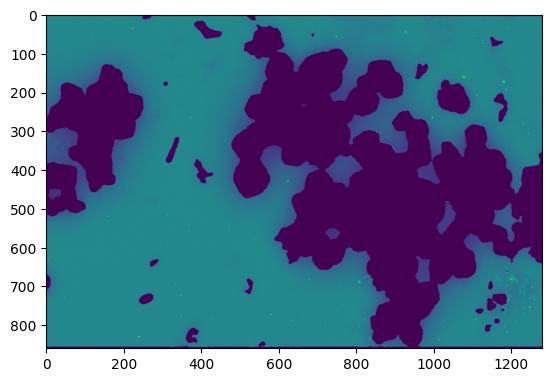

In [4]:
# Quick testing of h5 functionality
h5_path = "/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Training/2024_02_15_Jacob-P_Training/4 nM 1.h5"
f = h5py.File(h5_path,'r')
# <KeysViewHDF5 ['38.3 hold 6', '39.5 hold 1', '39.5 hold 2', '39.5 hold 3', '39.5 hold 4', '39.5 hold 5', '39.5 hold 6', '39.5 hold 7', '4 nM 1', '4 nM 10', '4 nM 3', '4 nM 4', '4 nM 5', '4 nM 6', '4 nM 7', '4 nM 8', '4 nM 9', 'L-2_nM-3_au10_mixing-T_oven-T_embed-SiO2_12', 'L-2_nM-3_au10_mixing-T_oven-T_embed-SiO2_21', 'L-9_nM-3_au10_mixing-T_oven-T_embed-SiO2_12']>
# NOTE: Every h5 is saved in a single file right now...
# Unsure if we event want that functionality?
print(len(df_mod[df_mod.Filename == '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/39.5 hold 6.bmp' ]))
print(f['38.3 hold 6']["Regions"])
# NOTE: Regions has a different length than the # of h5 files since some identified regions are duds (1 or less pixels)
# Also, regions are 1 indexing as a label, but 0 indexing as a file stack!

# Access and show Region 0 (presumably, background)
region_0 = f['38.3 hold 6']["Regions"][:][0,:,:]
plt.imshow(region_0)
region_0_region = feat.Region(region_0,featurizers=featurizer_list)
region_0_region.featurize()

In [5]:
## Define function for grabbing each region form the h5 file
def row_add_curvature_features(row:pd.Series):
    '''
    Row of data holds information about its image AND its rows
    '''
    
    region_identity = row.Region
    region_source_file = row.quick_img_tag
    region_img = f[region_source_file]["Regions"][:][region_identity-1,:,:]
    region = feat.Region(region_img,featurizer_list)
    try:
        feature_dict = region.featurize()
        return pd.Series(feature_dict)
    except Exception as exc:
        print(row)
        plt.imshow(region_img)
        raise Exception(exc)

# Note: 2000 images takes about 14 minutes (16 with counts added)
# Optimization Note: Doing a concave, convex path finder takes 2 minutes for 2000 images
# This is a free speed-up if I memoize the region
# Maybe "get_region_curvatures" is not recalculated for a region if it's already stored?
# Memoizstion speed up: 7 minutes
df_curvatures = df_mod.apply(row_add_curvature_features,axis=1)

/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/facet_ml/segmentation/features.py:389: RankWarning: Polyfit may be poorly conditioned
  curvature = compute_curvature(point, i, contour, window_size)
/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/facet_ml/segmentation/features.py:389: RankWarning: Polyfit may be poorly conditioned
  curvature = compute_curvature(point, i, contour, window_size)
/Users/jacobpietryga/anaconda3/envs/colloidal_crystal_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jacobpietryga/anaconda3/envs/colloidal_crystal_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jacobpietryga/anaconda3/envs/colloidal_crystal_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  ret

In [6]:
df_curvatures
df_mod
df_combined = pd.concat([df_curvatures,df_mod],axis=1)

save_csv_path = "/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/ProcessedData/Training_Data_20240216/2024_02_27_Rachel-C_Processed.csv"
df_combined.to_csv(save_csv_path)

/Users/jacobpietryga/anaconda3/envs/colloidal_crystal_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/jacobpietryga/anaconda3/envs/colloidal_crystal_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


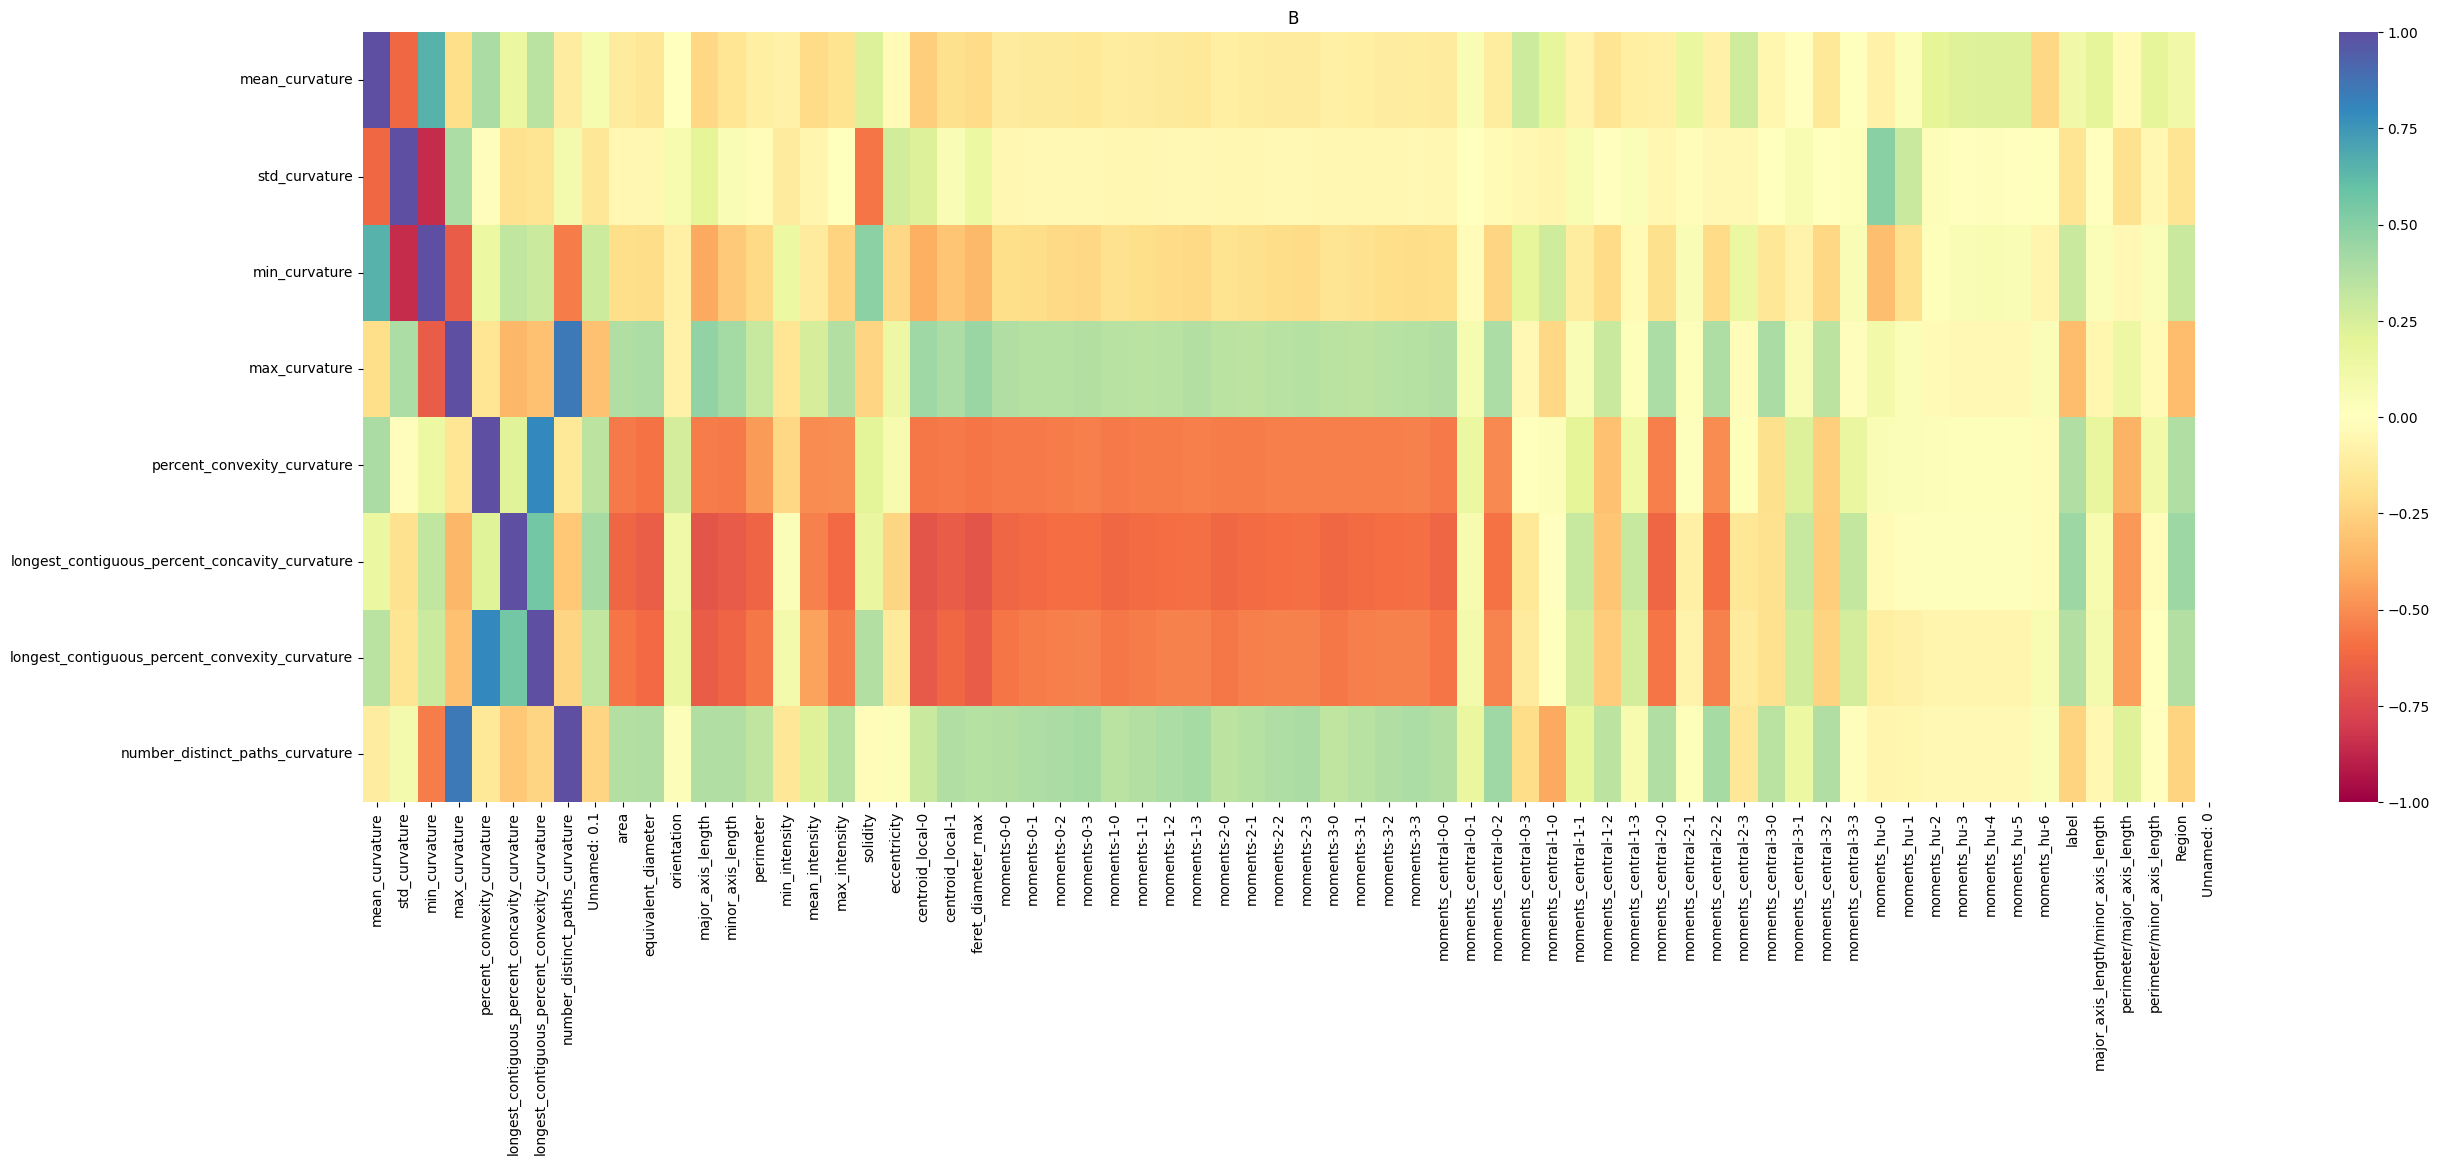

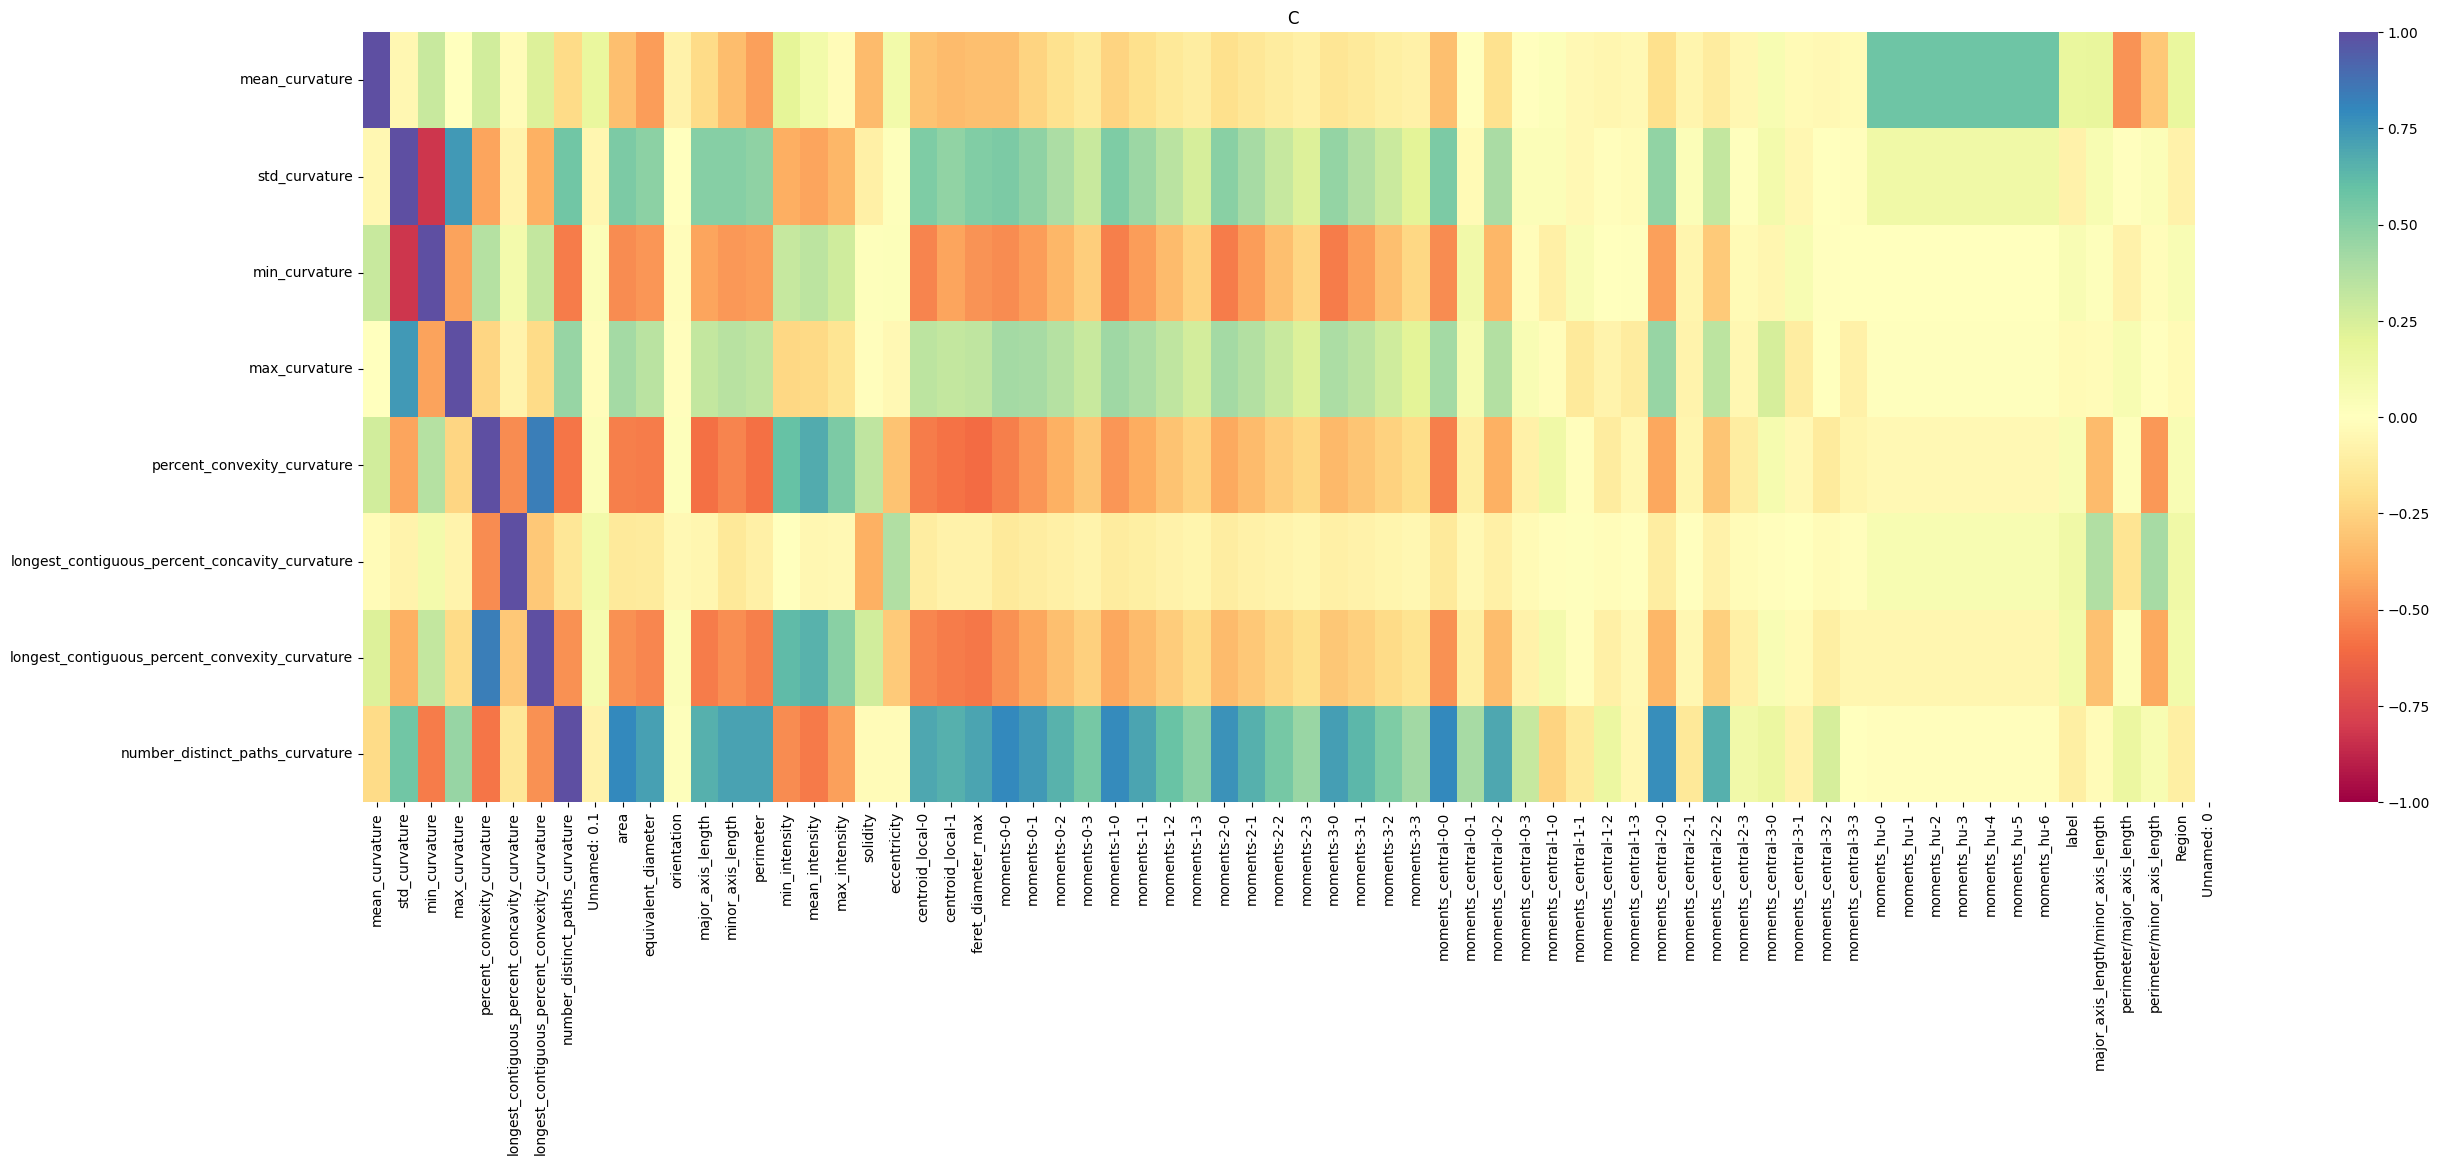

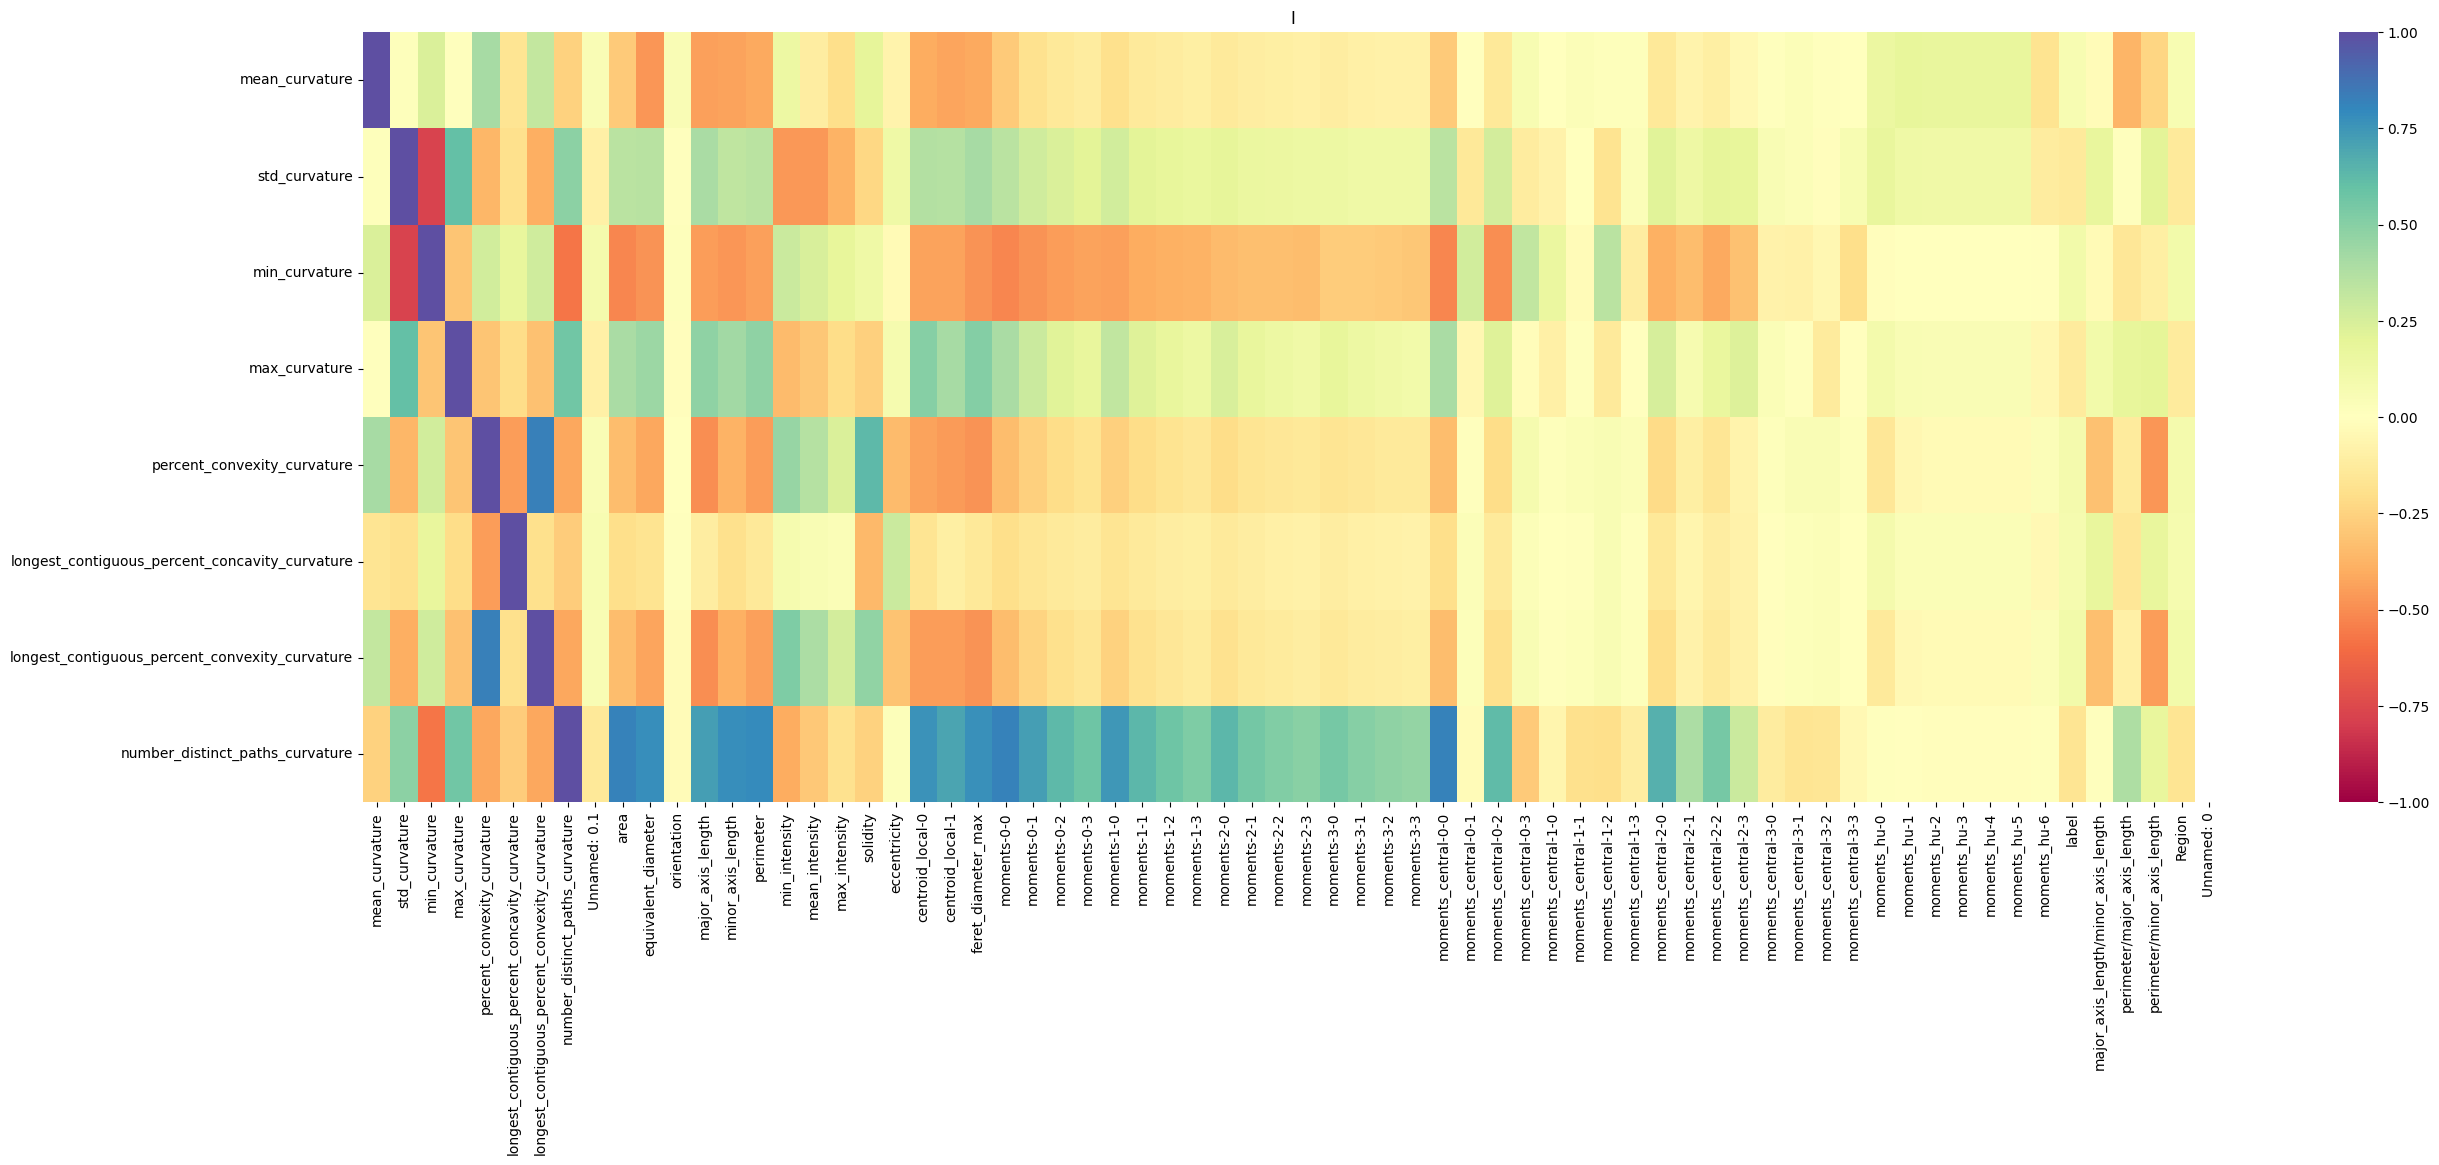

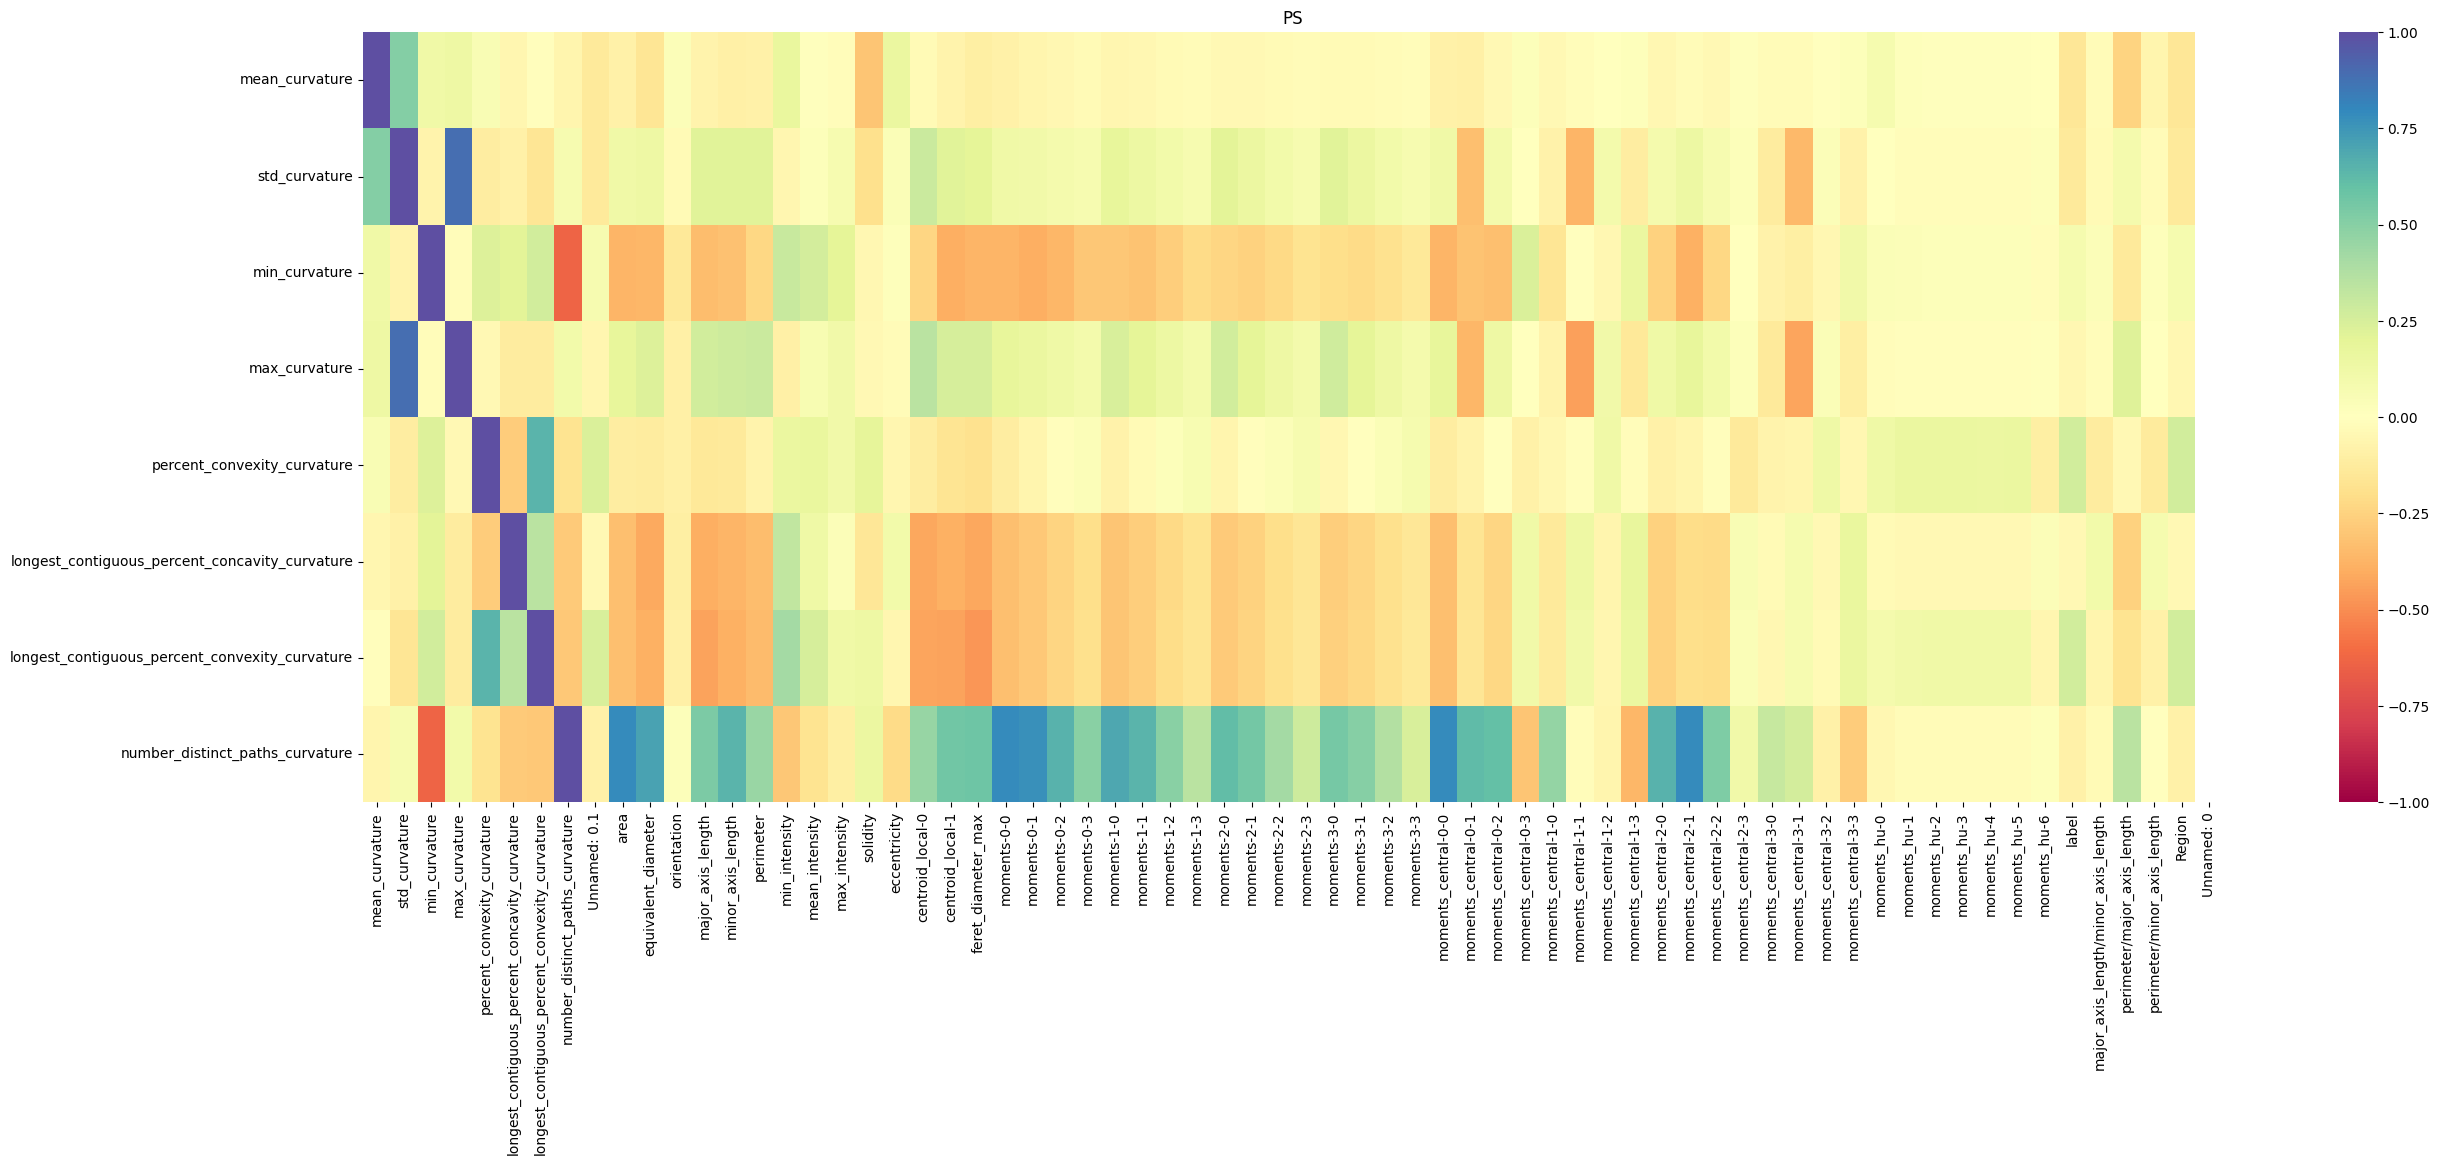

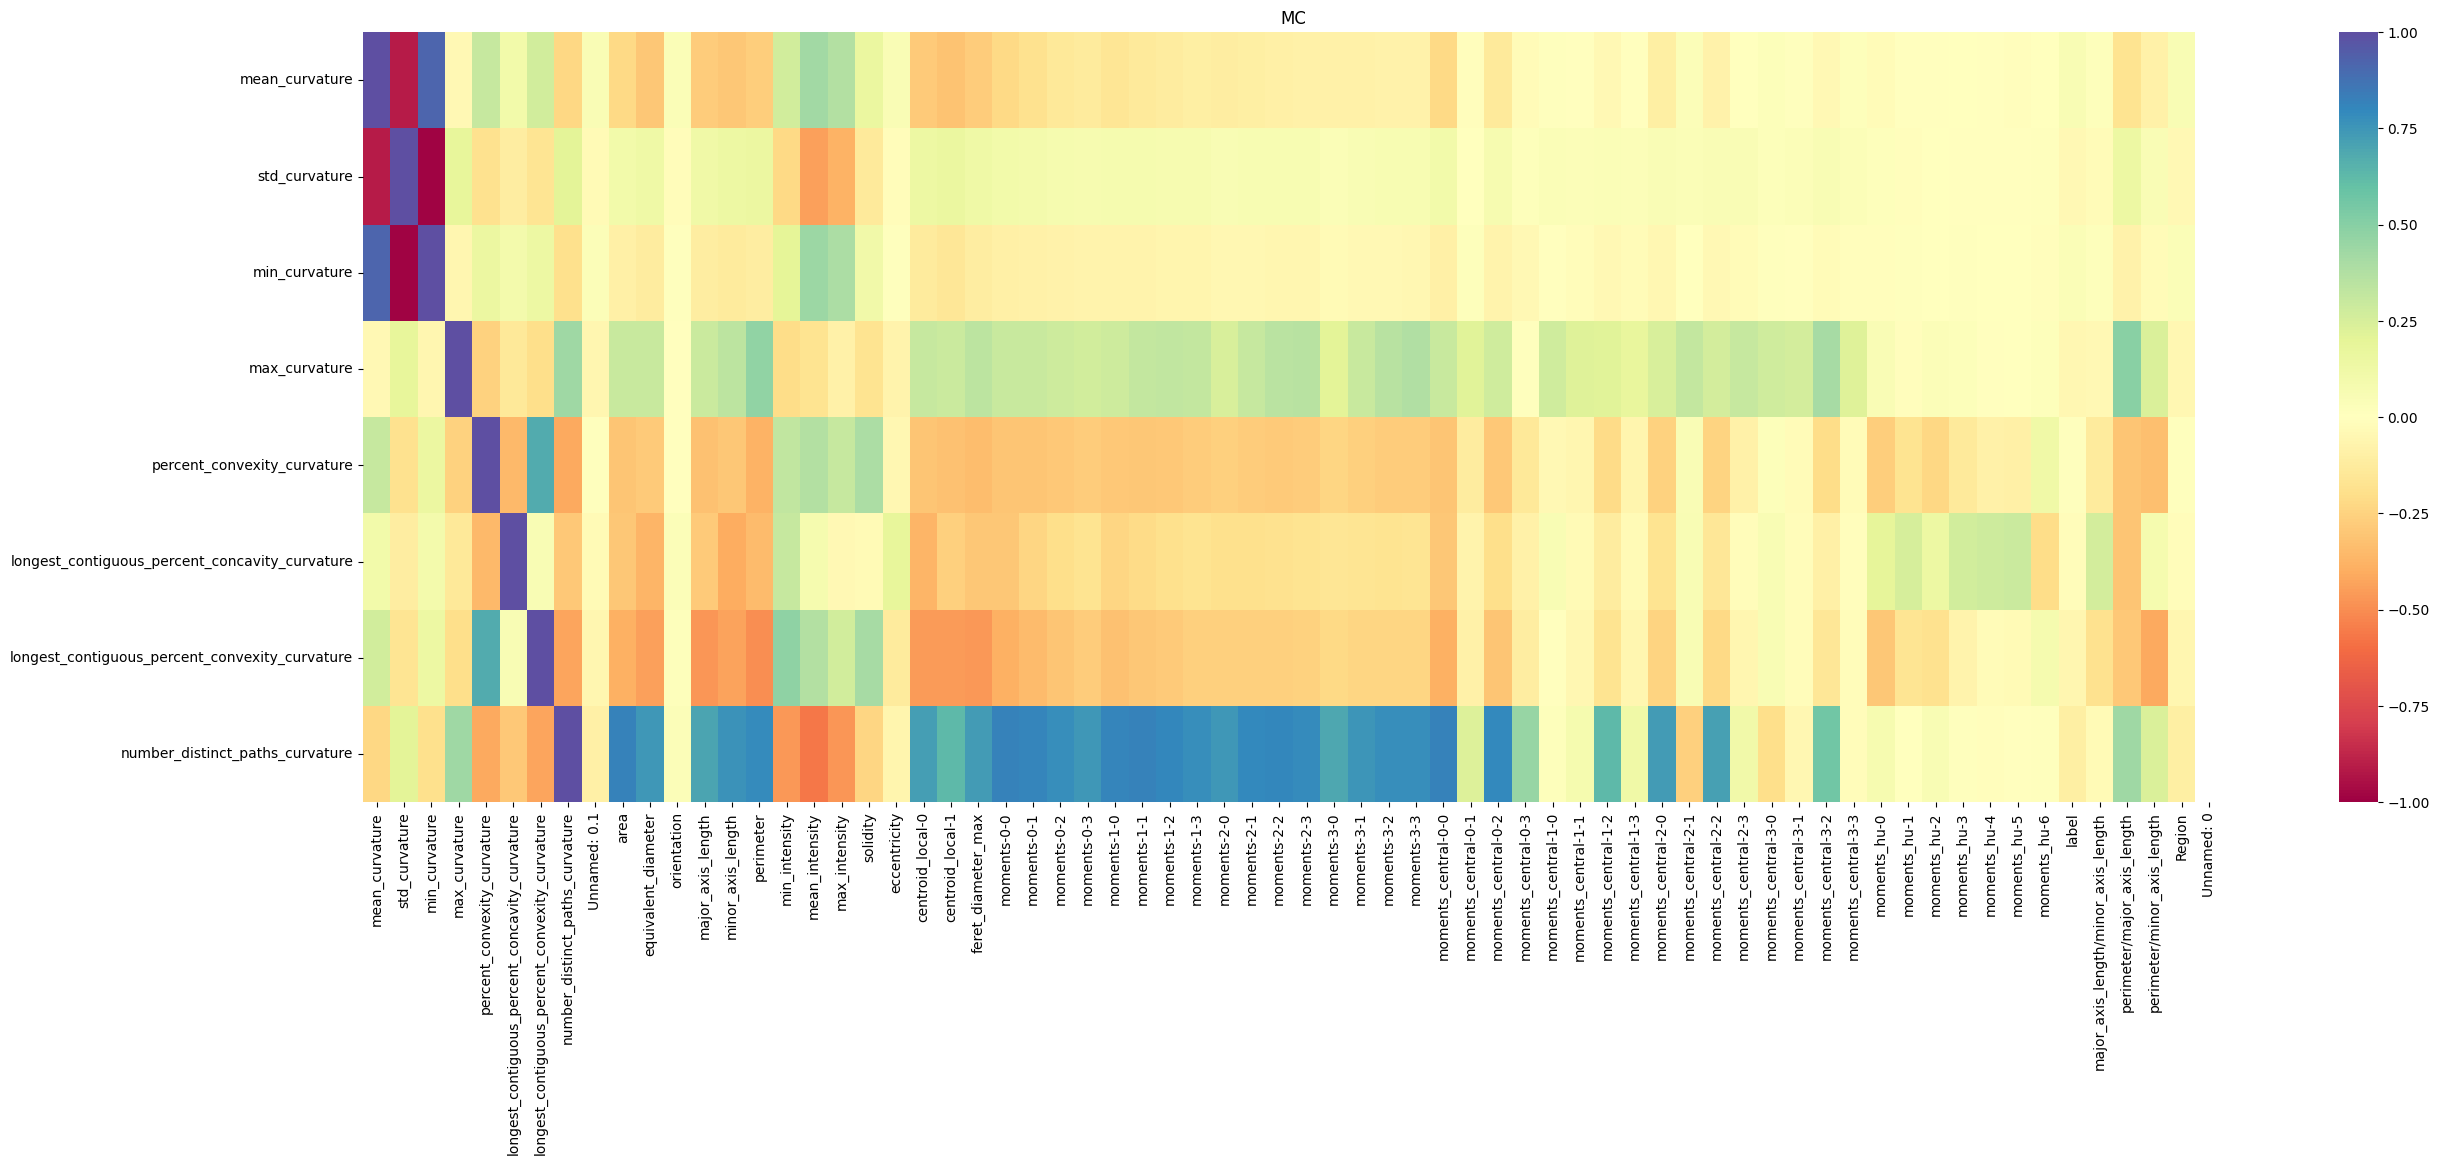

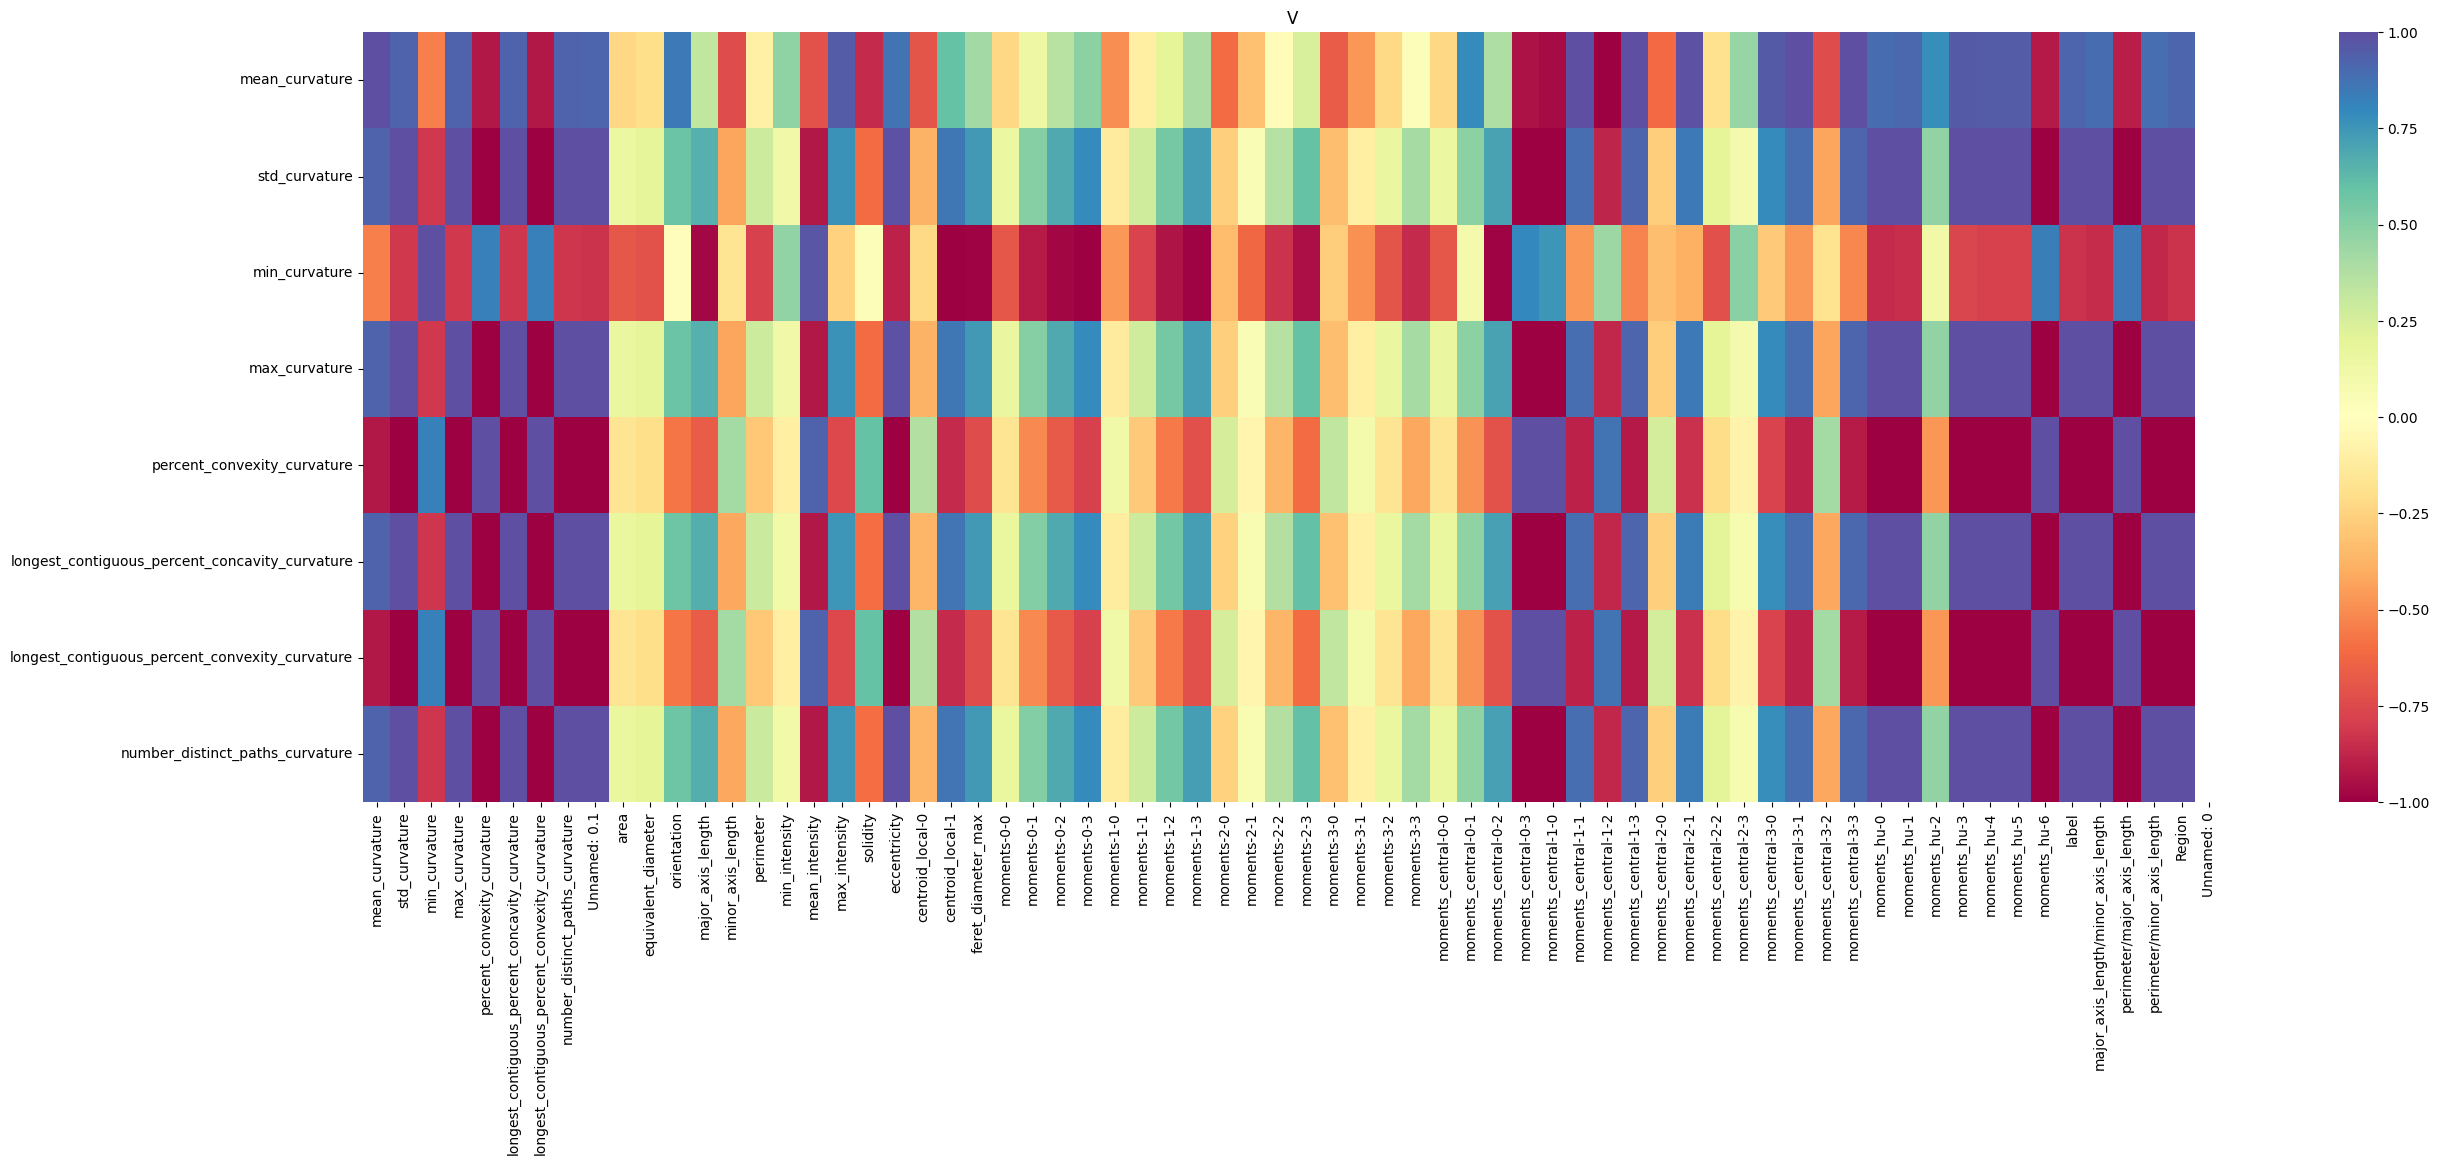

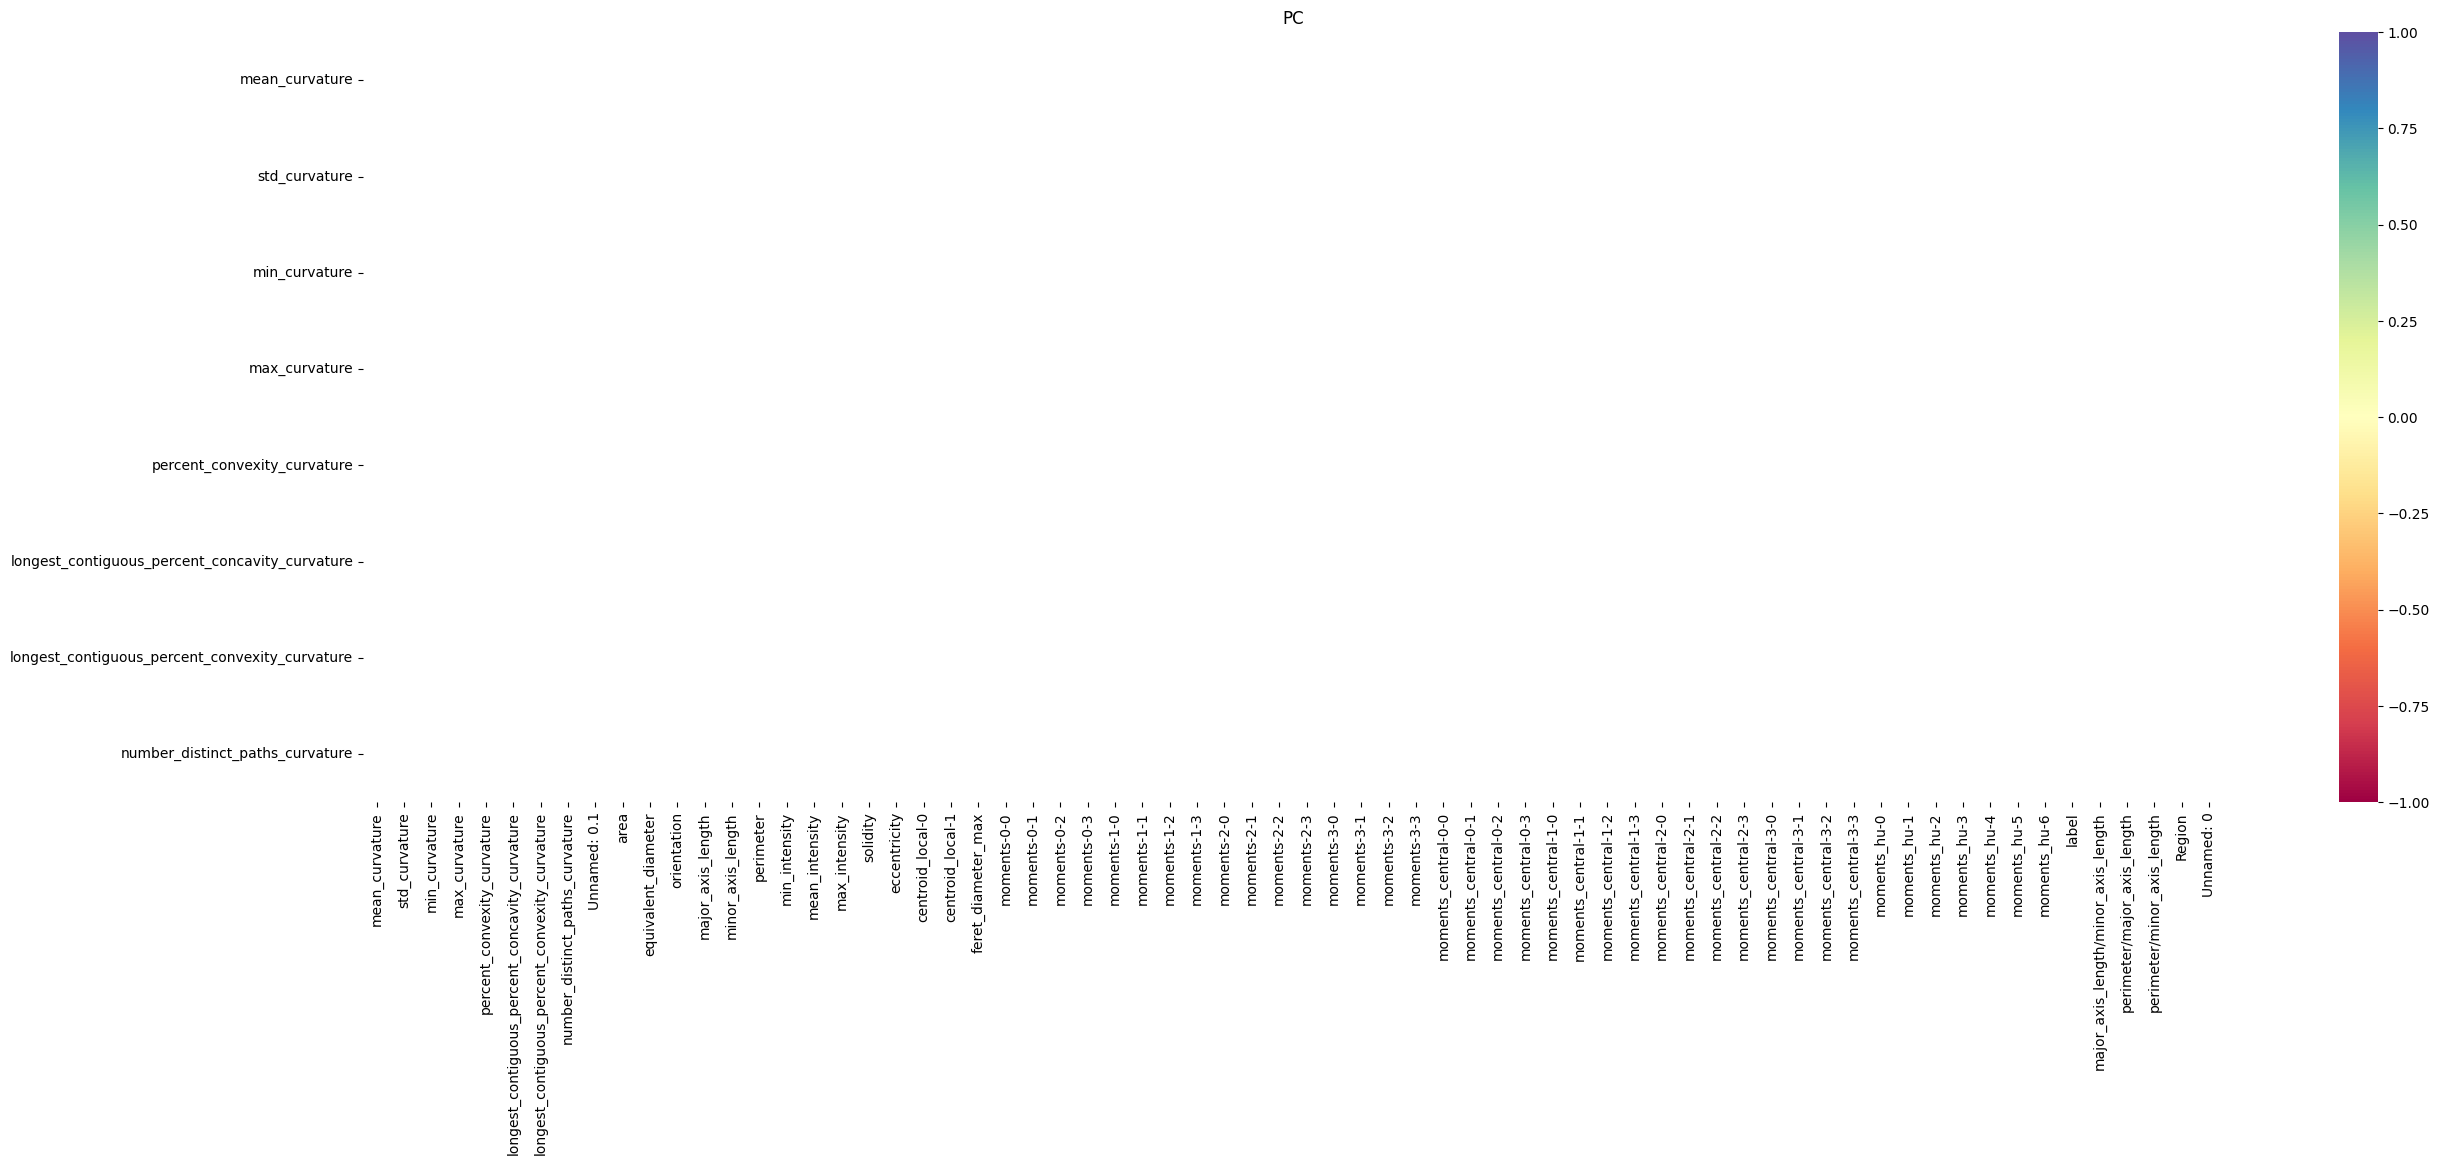

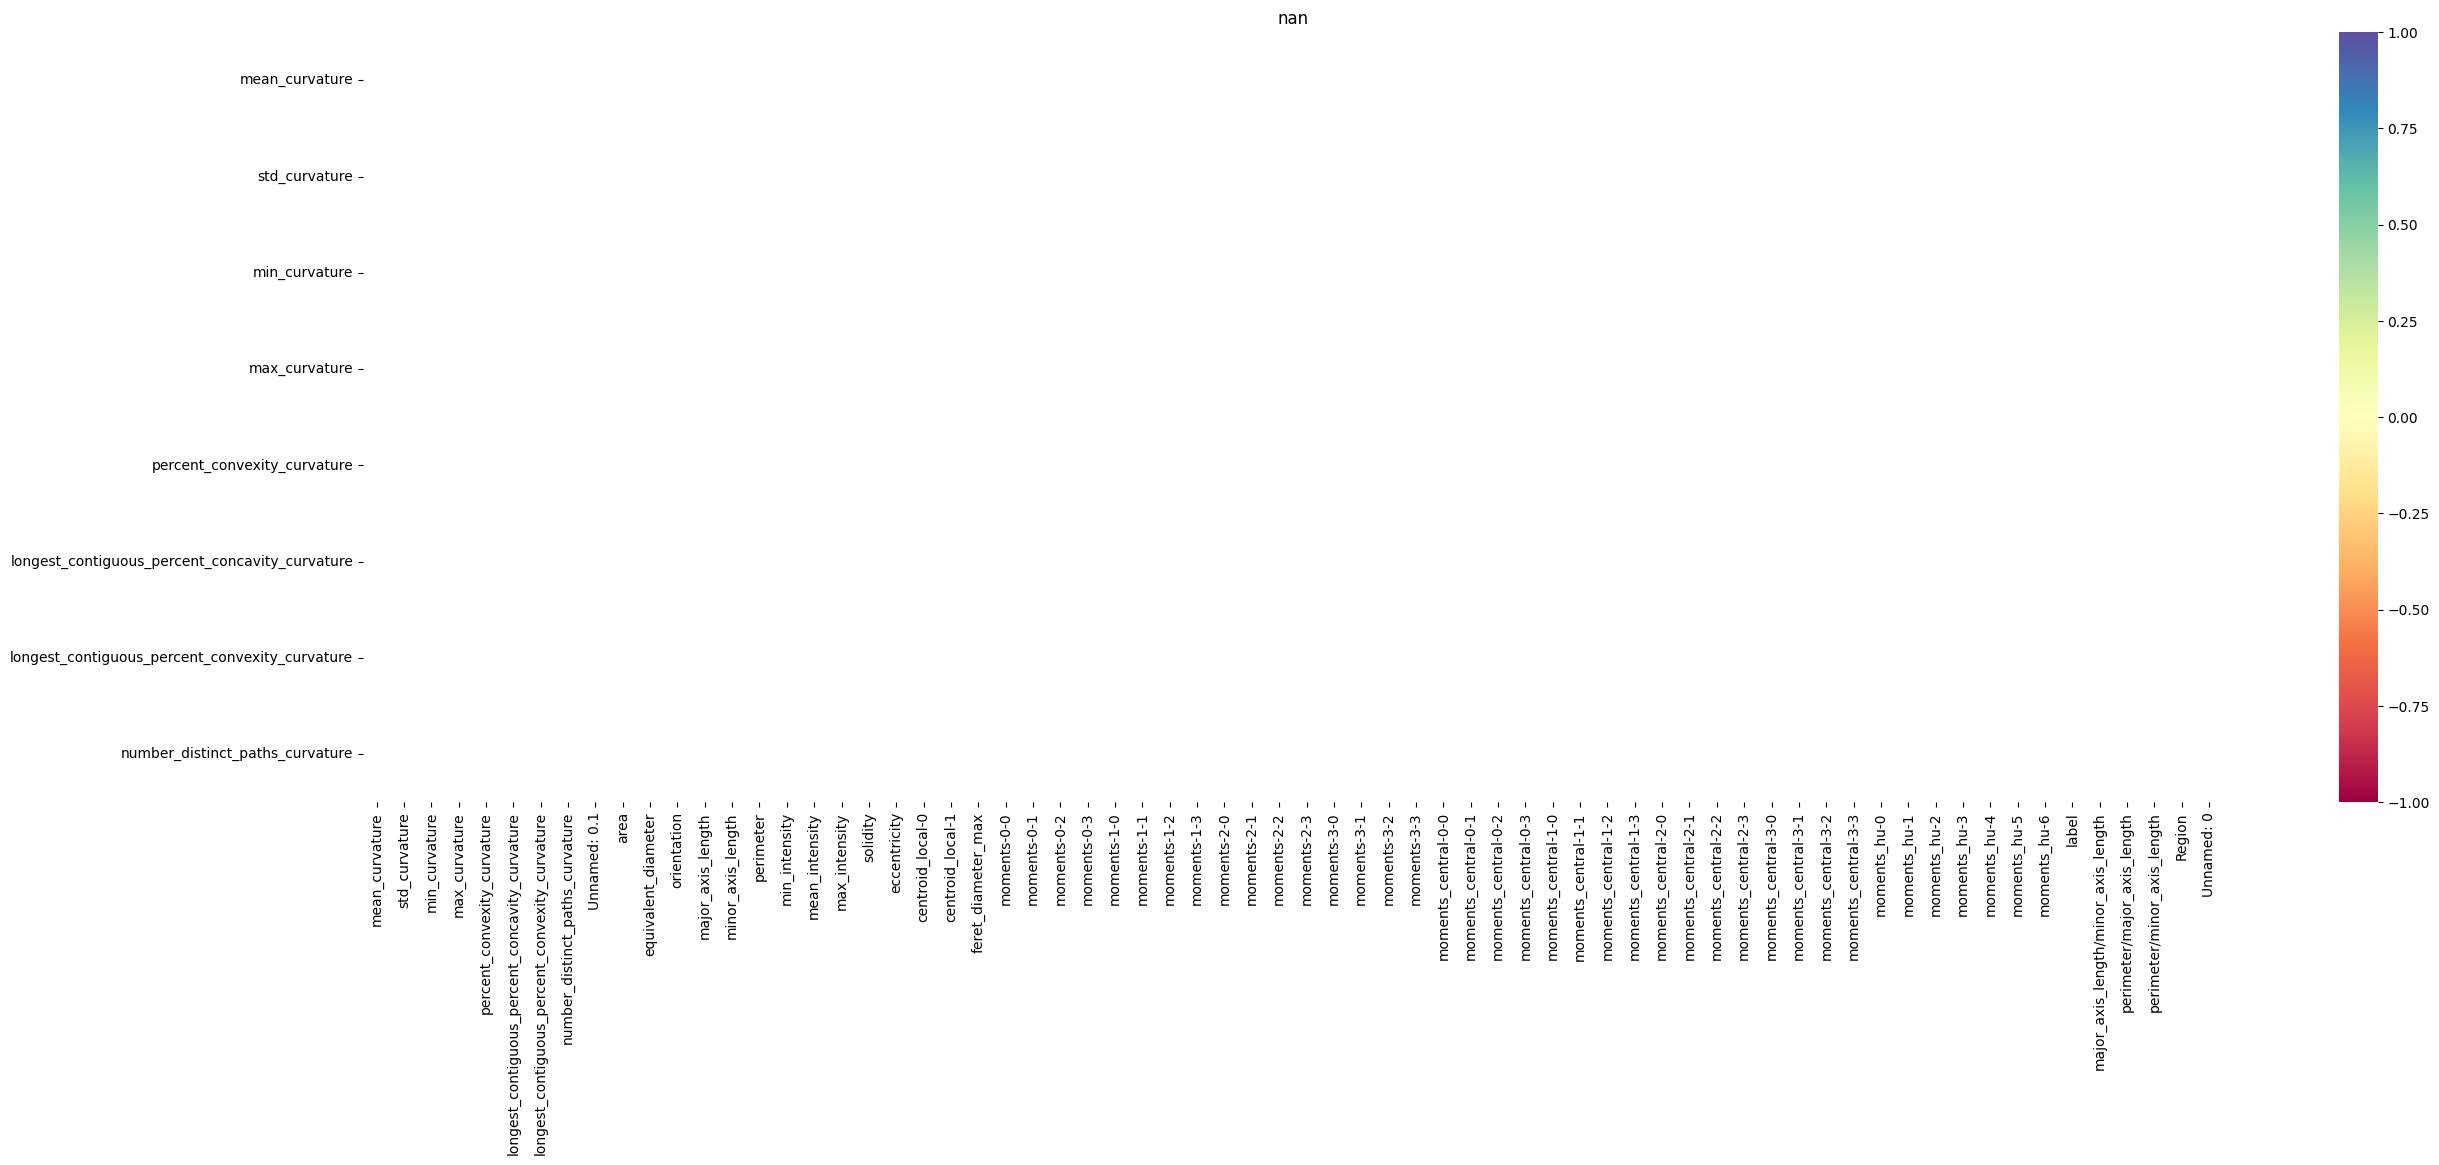

In [7]:
# Let's try running some data anaylsis on this dataframe
from heatmap import corrplot
import seaborn as sn
cmap = plt.get_cmap("Spectral")
norm = plt.Normalize(vmin=-1,vmax=1)
for unique_label in df_combined.Labels.unique():
    df_sub = df_combined[df_combined.Labels == unique_label]
    correlation = df_sub.corr()
    fig,ax = plt.subplots(figsize=(30,10))
    correlation = correlation.loc[correlation.index.str.contains("curvature")]
    sn.heatmap(correlation,ax=ax,cmap=cmap,norm=norm)
    ax.set_title(unique_label)

/var/folders/vk/znvr66h543g3tt_w4mwmsslh0000gn/T/ipykernel_93134/3050073955.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


TypeError: Neither the `x` nor `y` variable appears to be numeric.

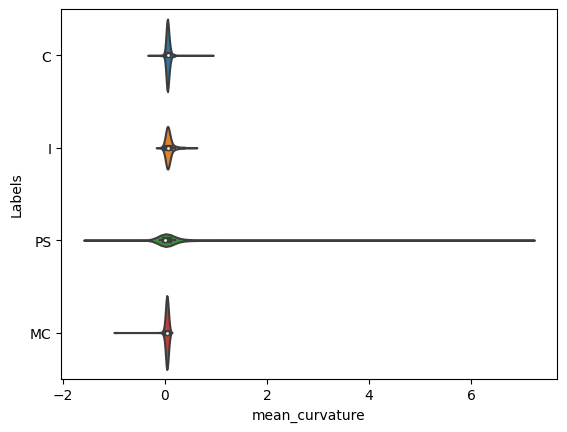

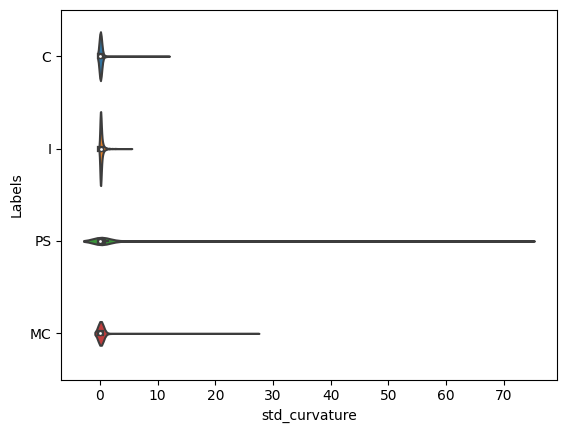

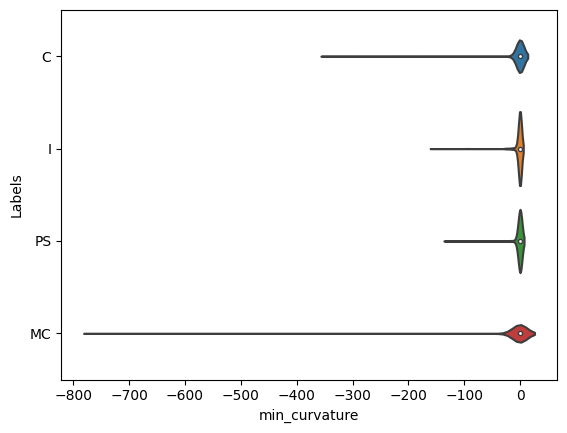

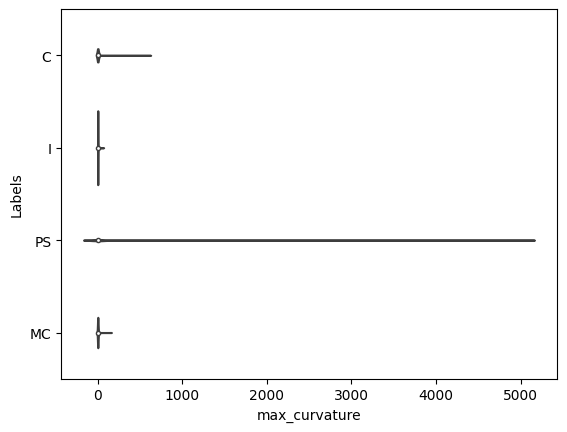

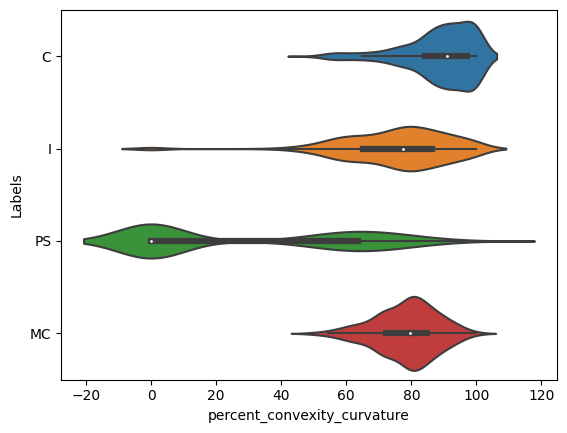

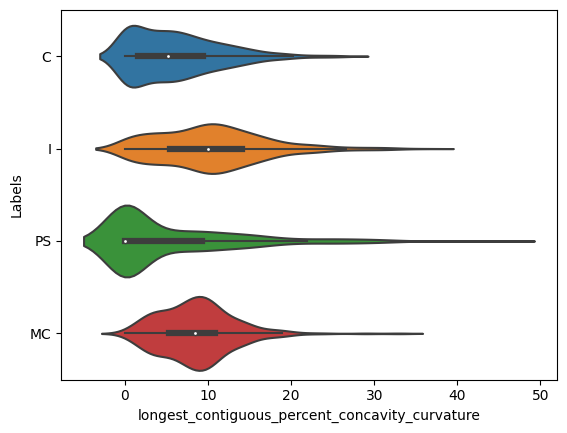

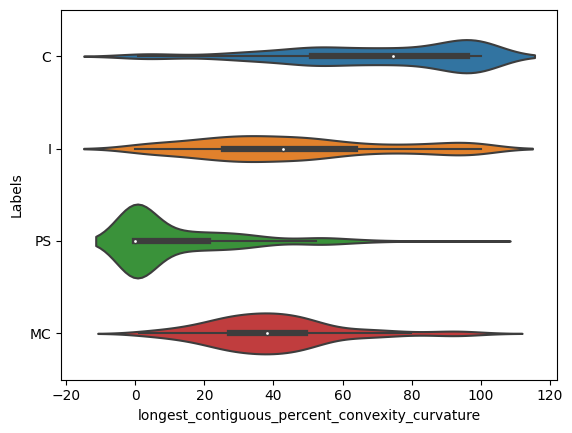

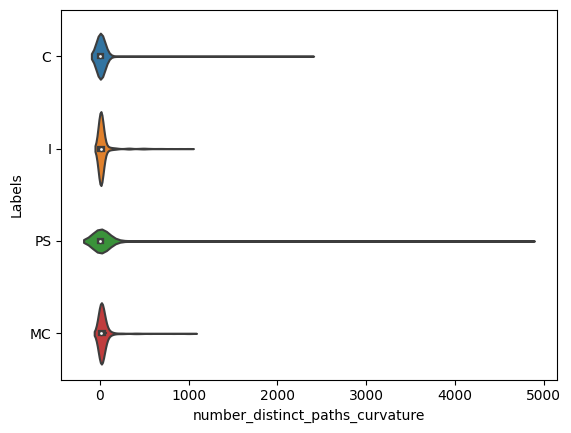

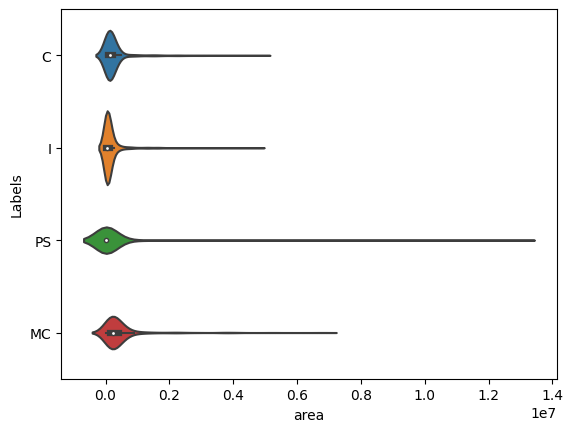

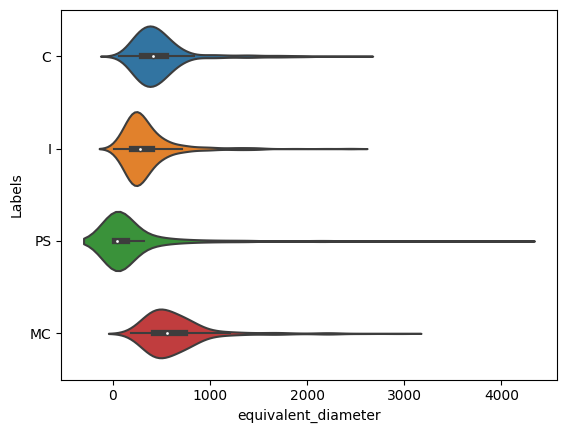

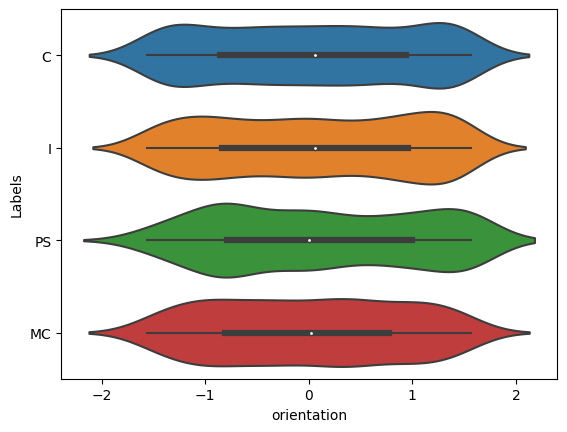

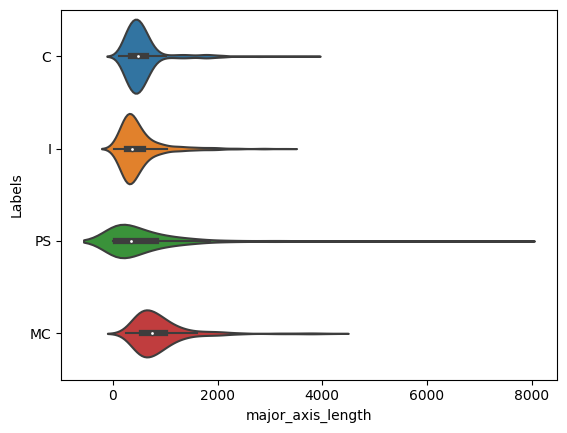

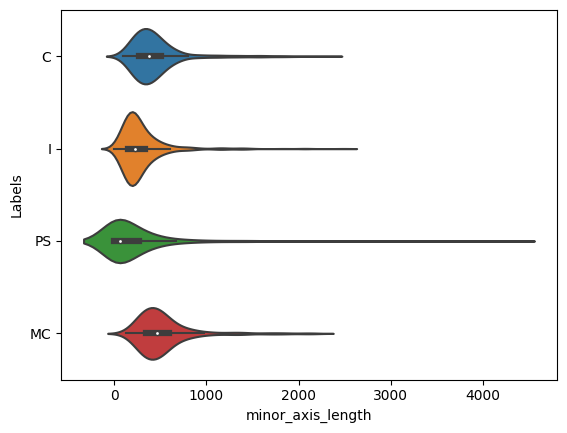

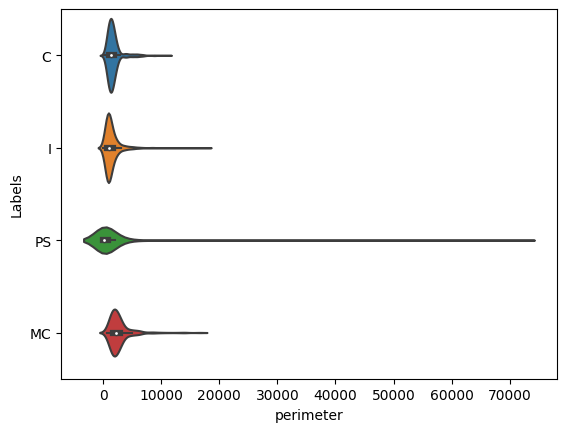

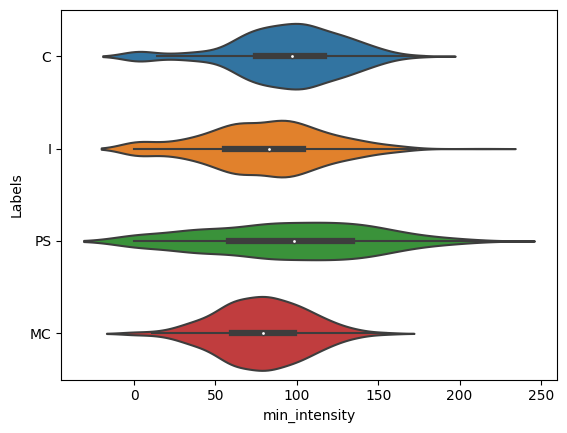

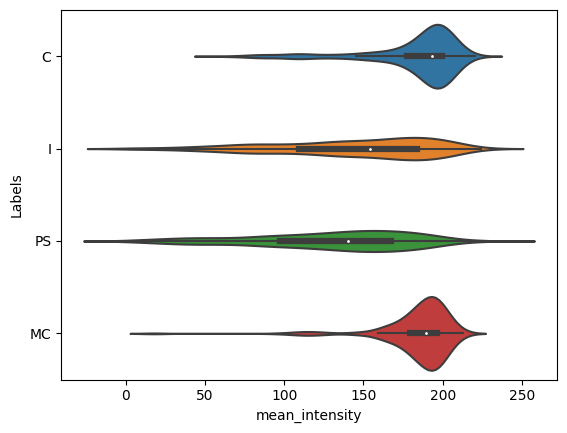

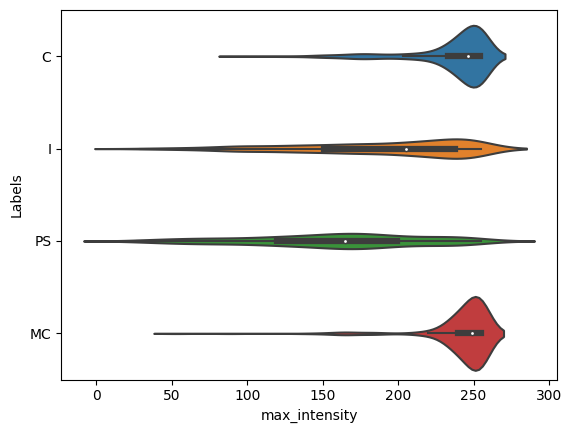

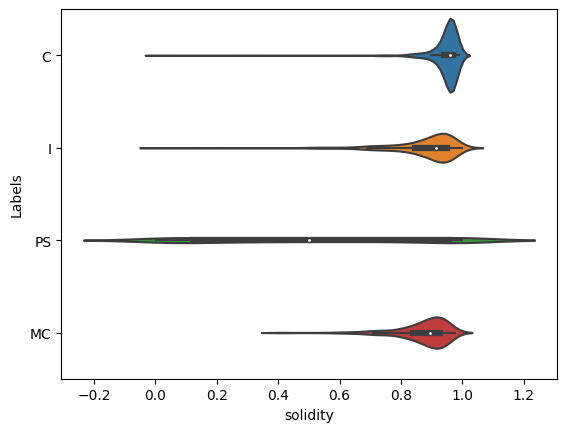

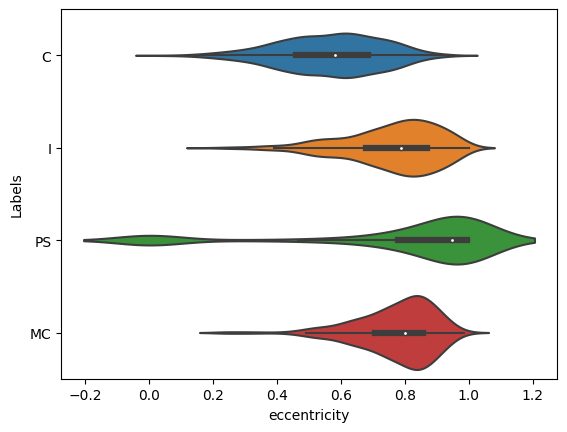

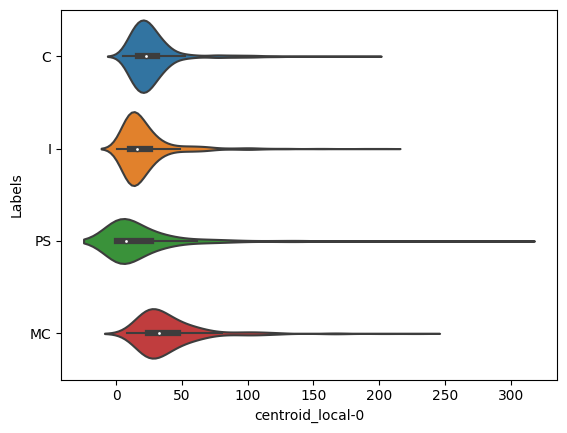

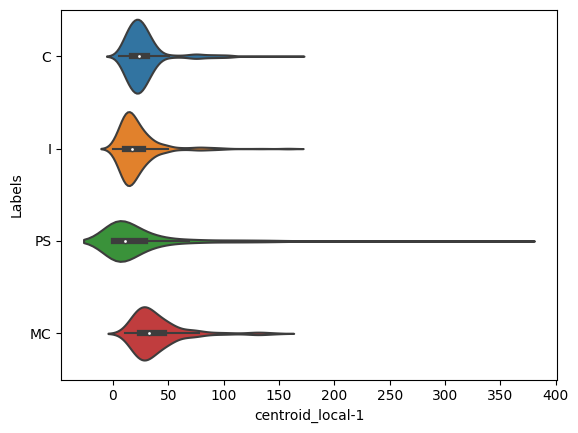

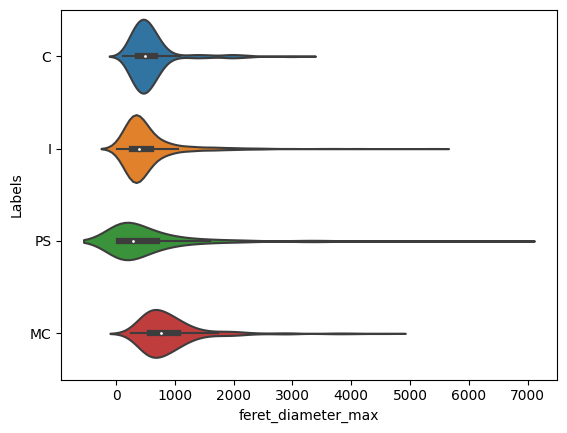

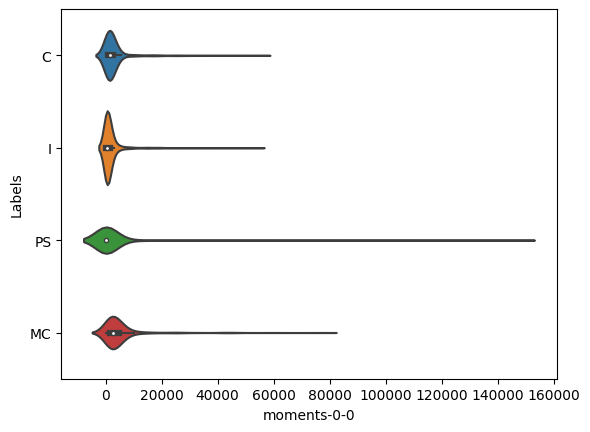

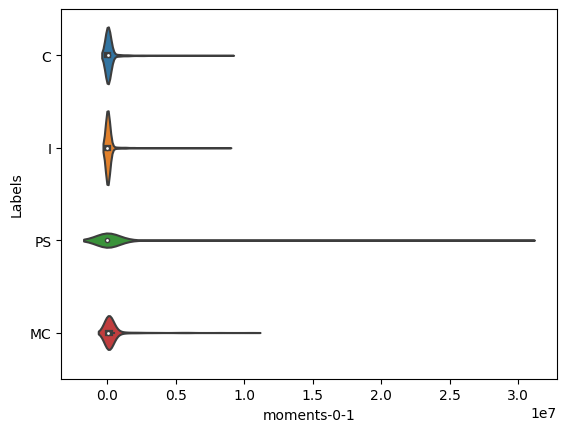

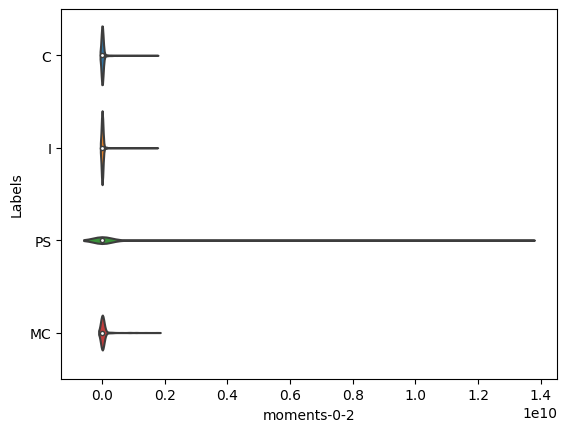

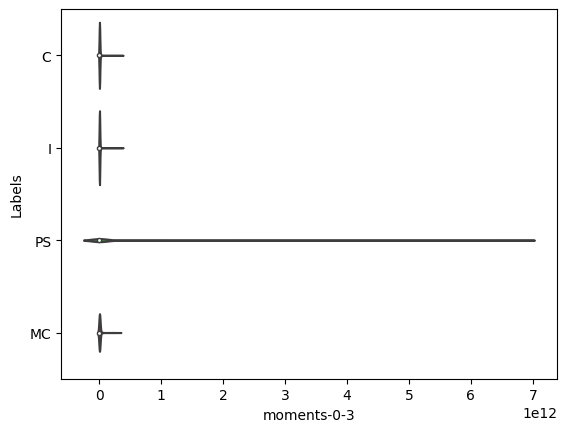

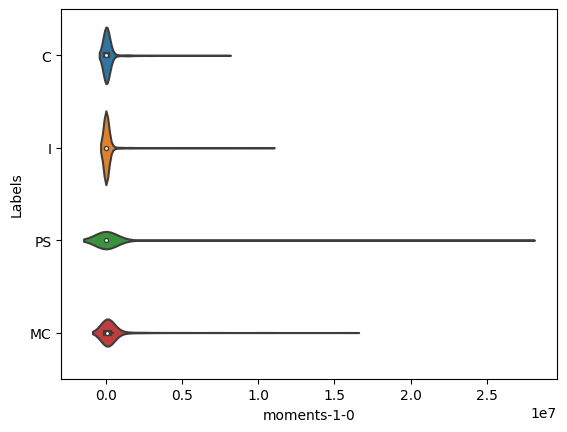

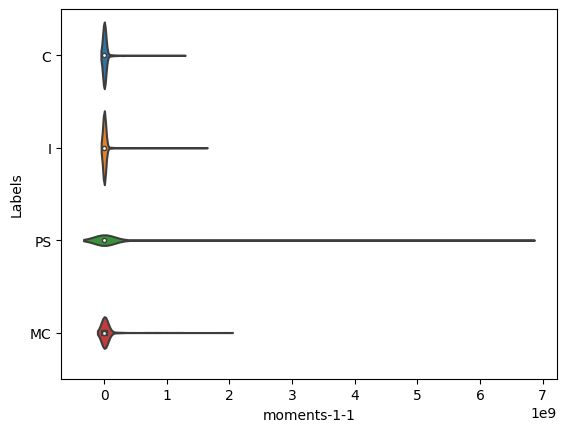

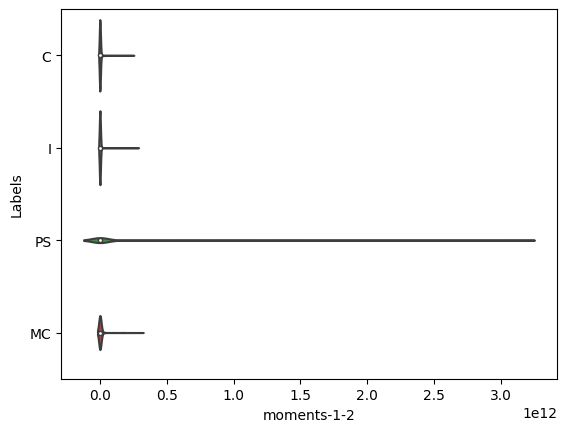

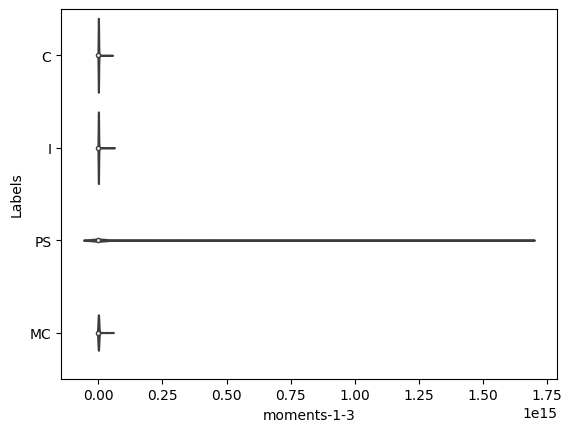

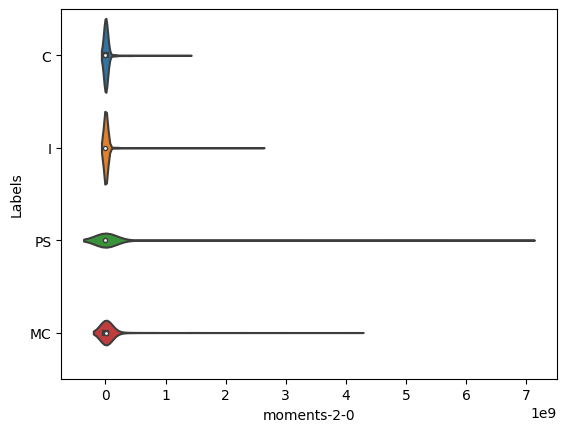

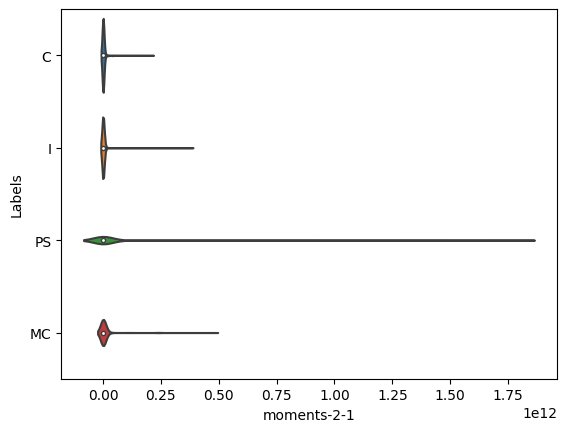

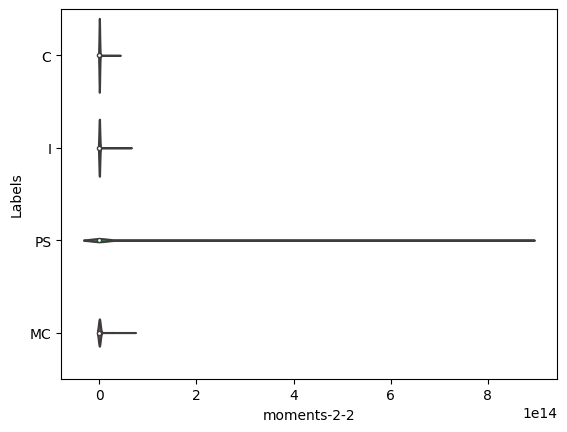

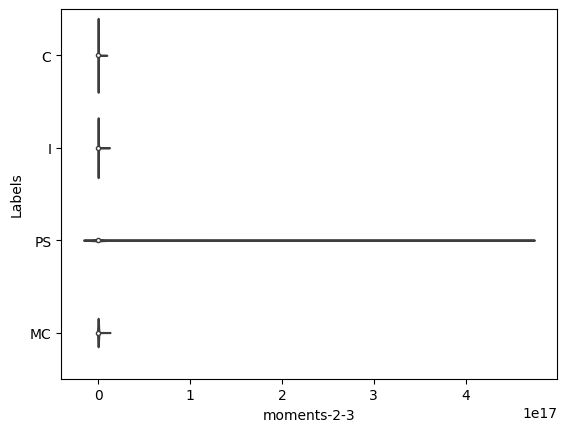

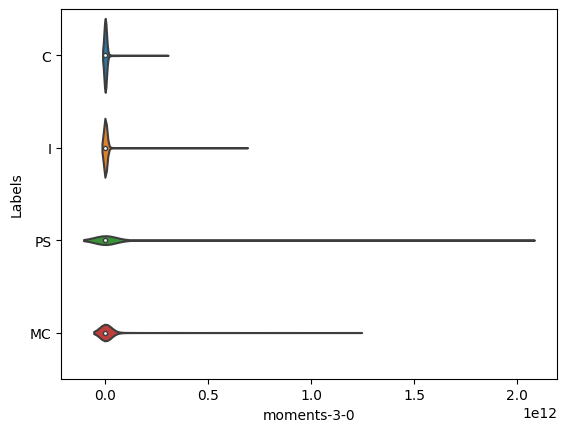

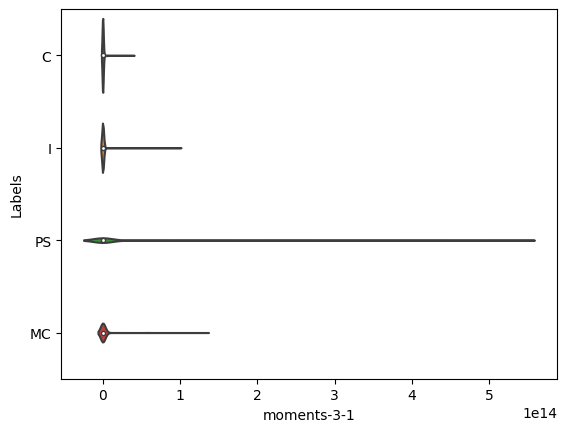

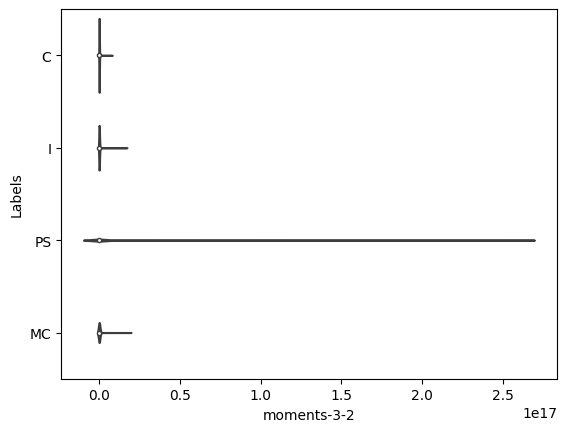

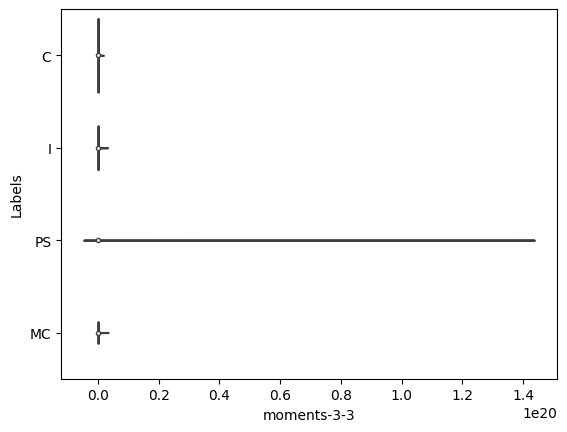

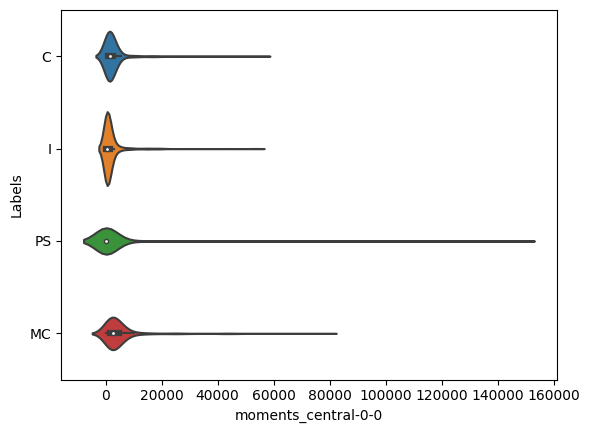

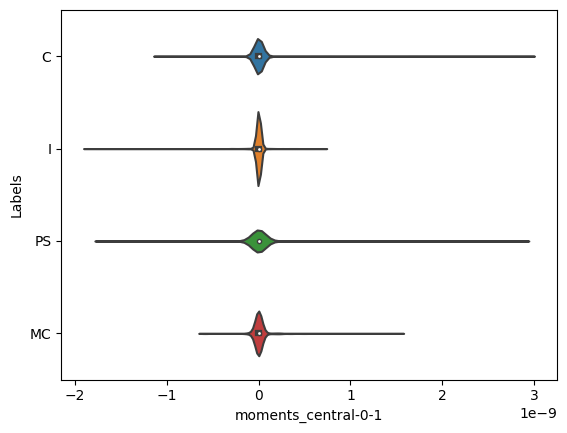

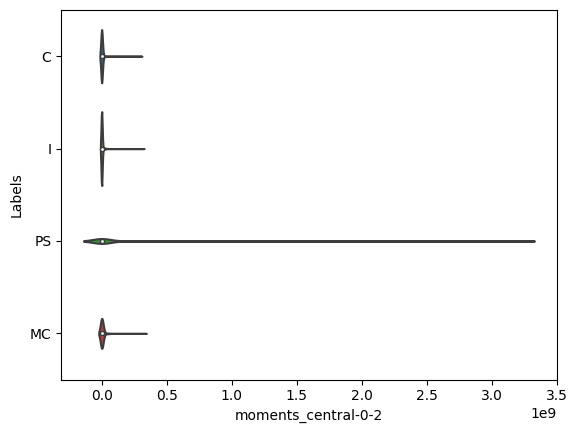

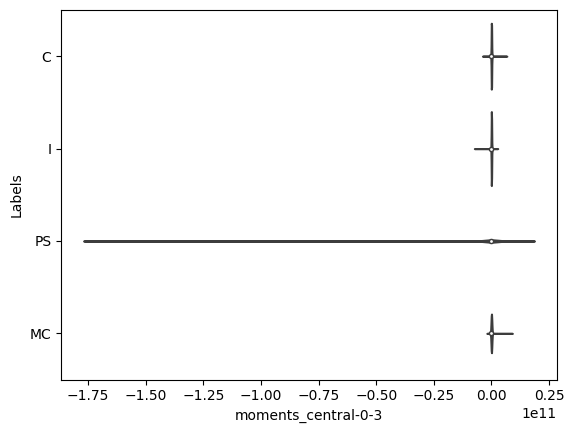

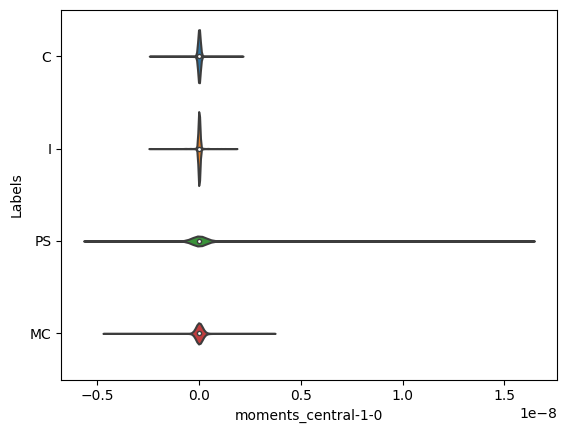

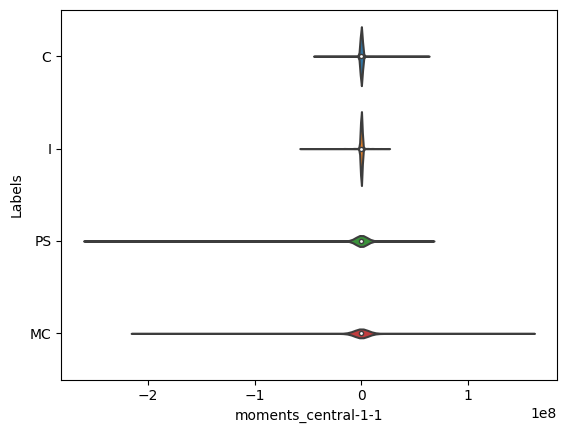

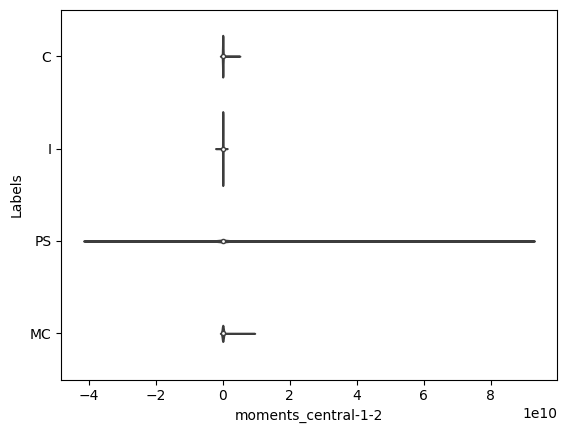

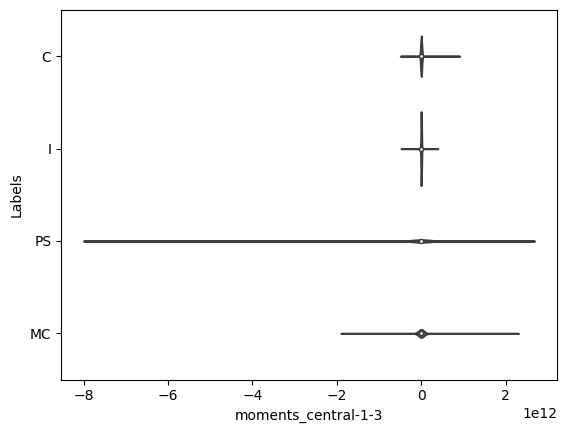

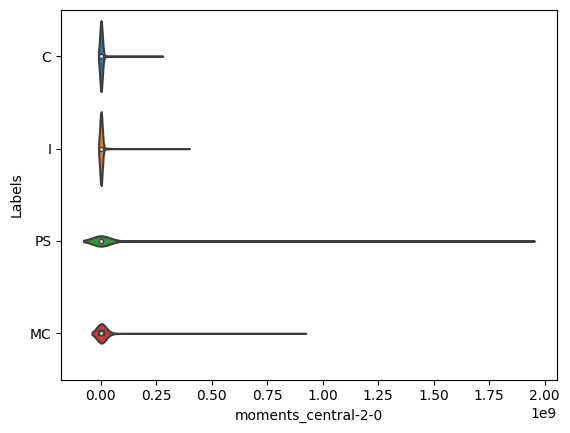

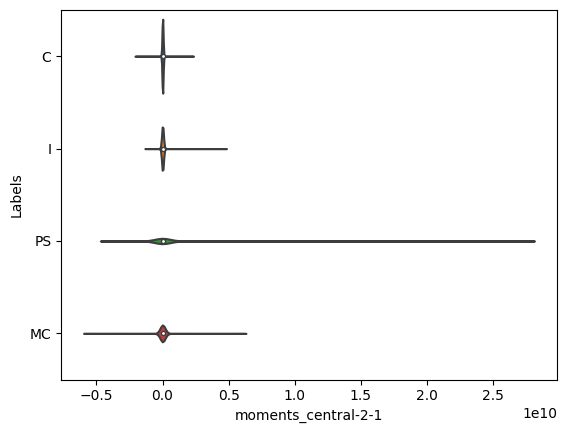

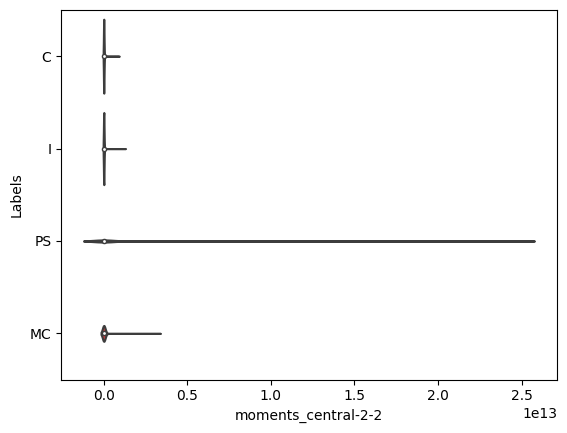

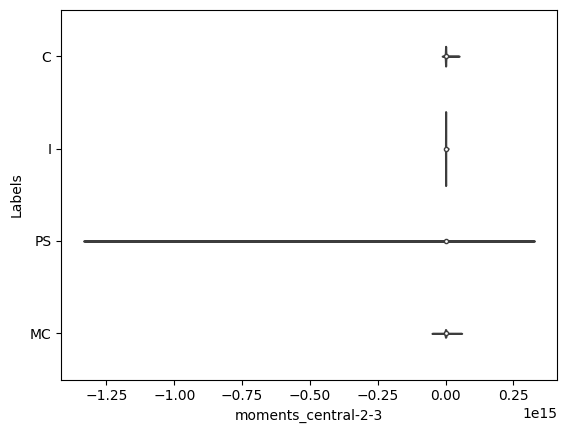

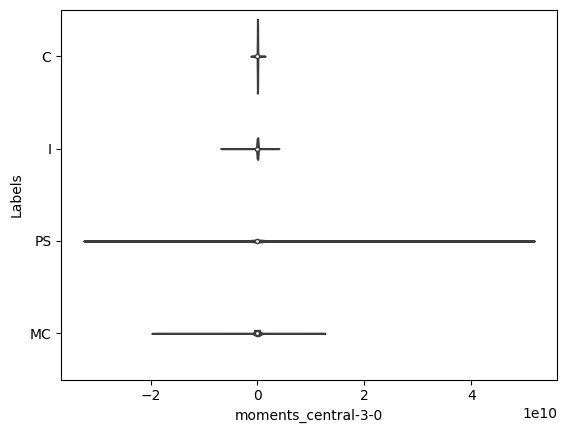

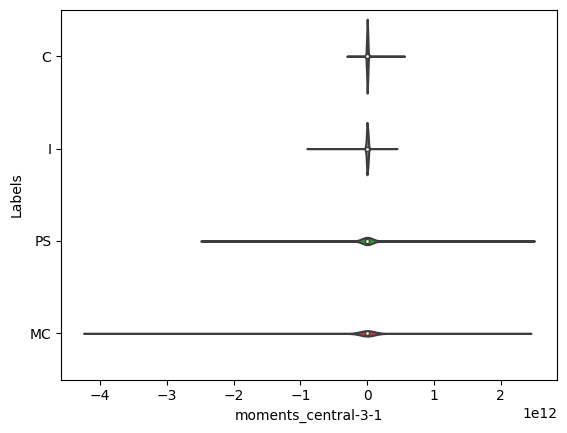

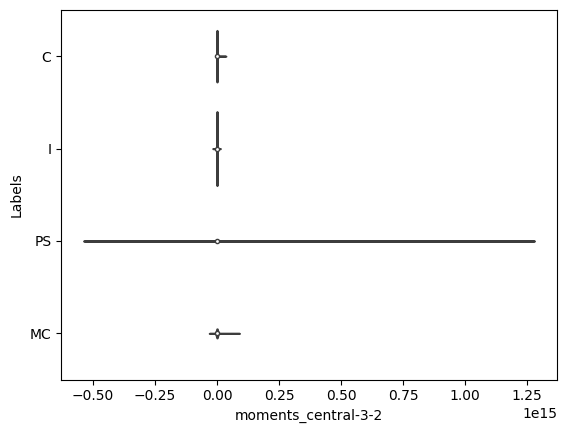

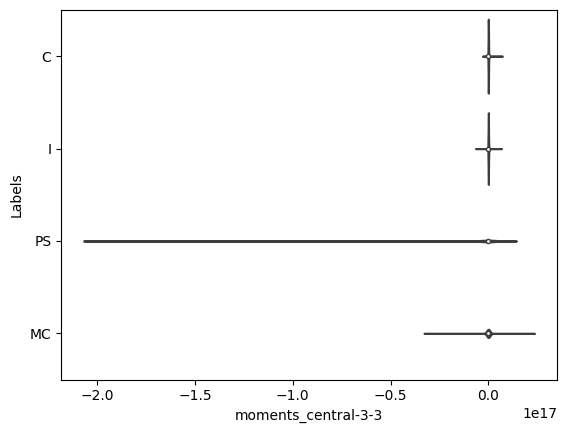

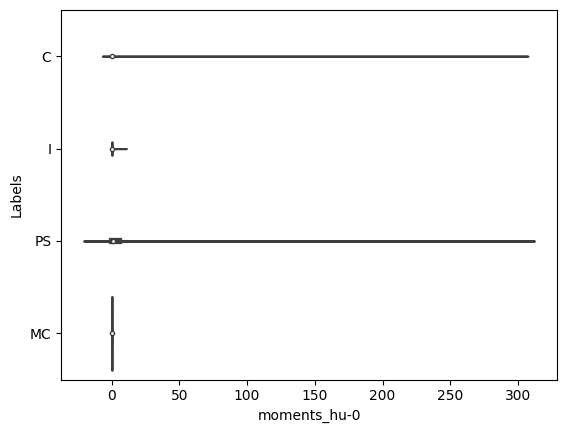

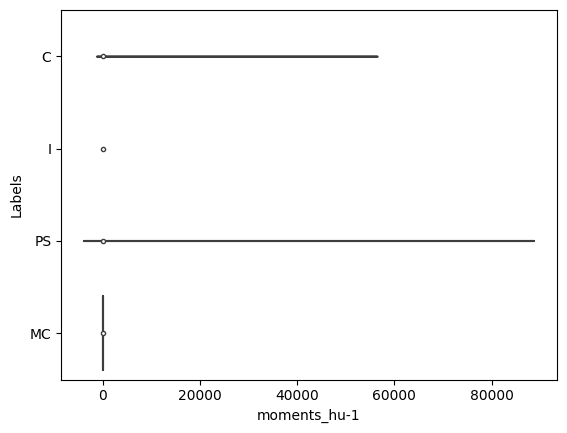

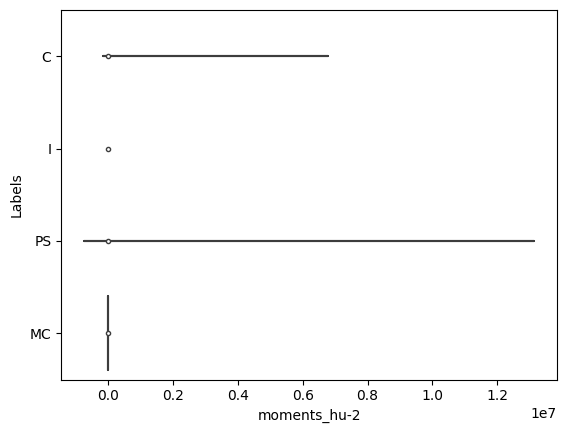

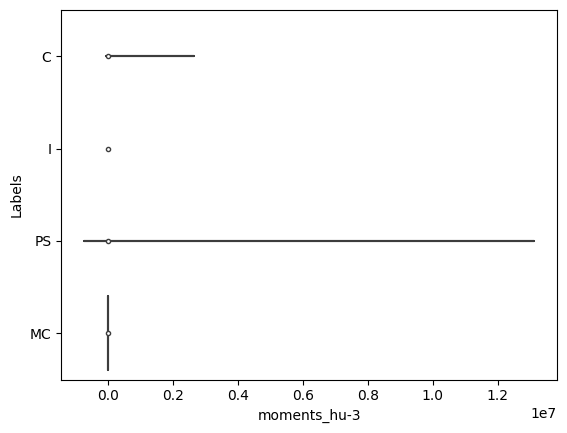

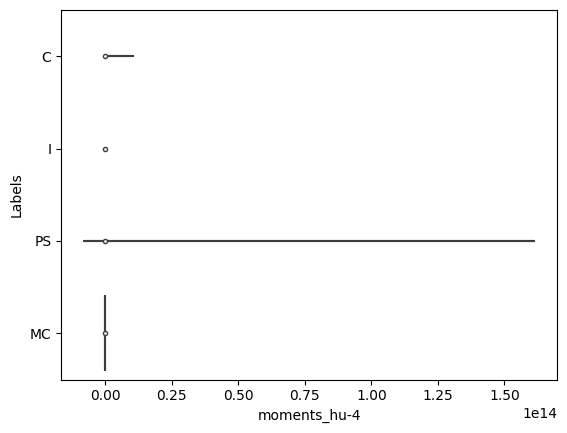

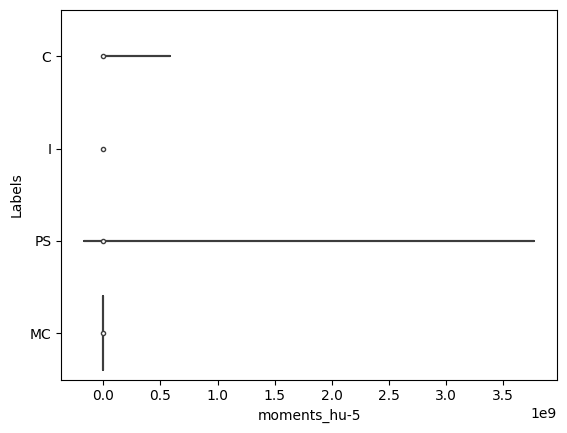

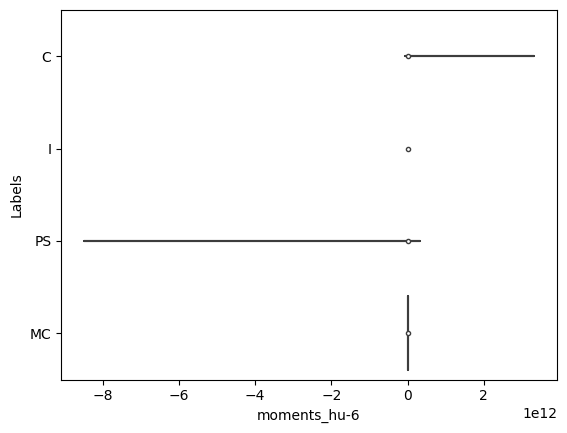

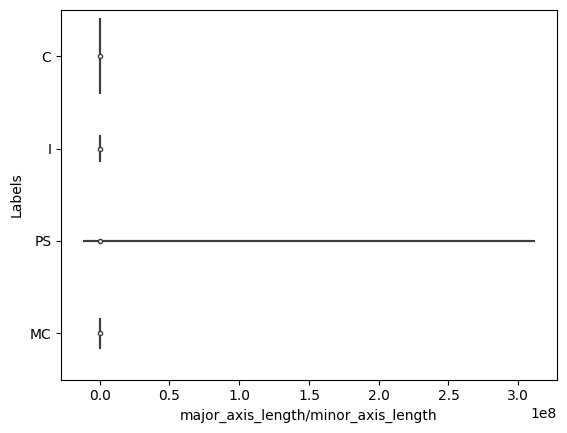

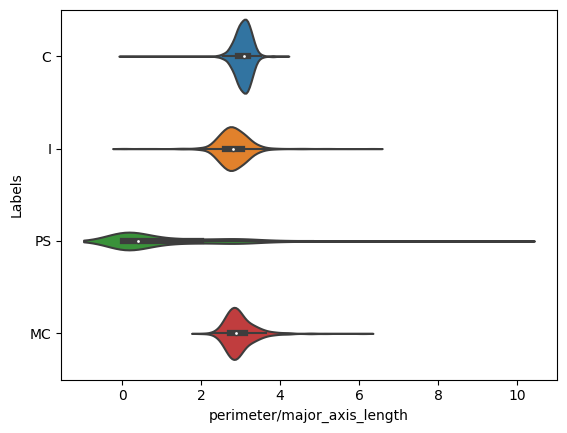

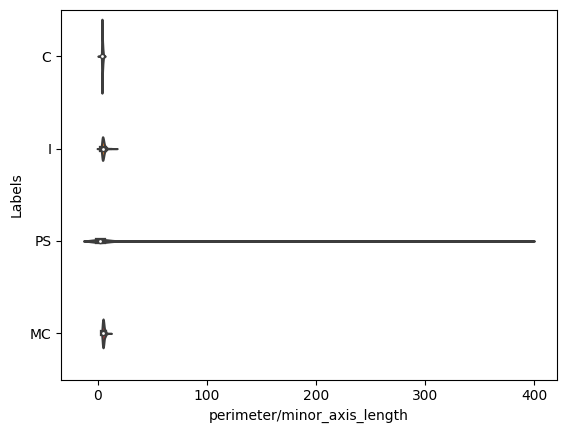

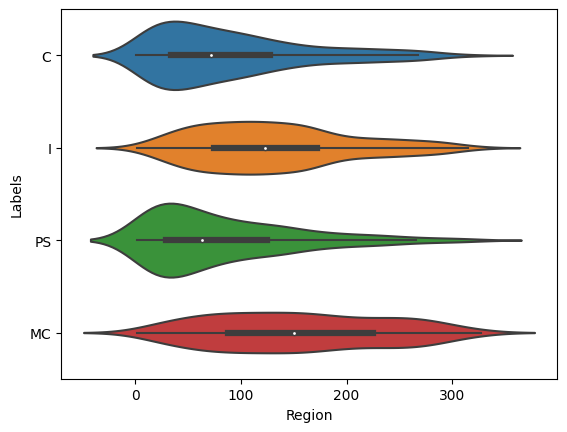

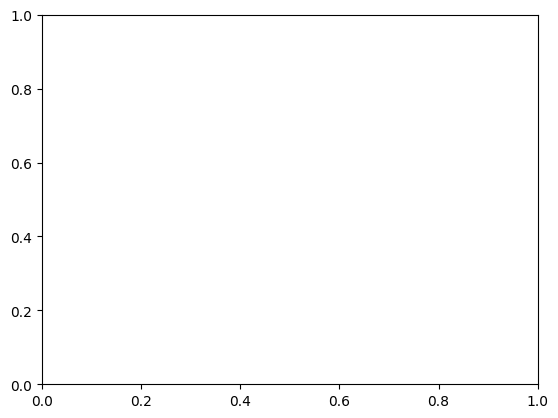

In [8]:
import seaborn as ss 

df = df_combined.replace([np.inf, -np.inf,np.nan], 0, inplace=False)
#df.dropna(inplace=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df_sub = df[df.Labels.isin(["I","C","MC","PS"])]

for feature in df.columns:
    if feature in ["label","Labels","Filename"]:
        continue
    fig, ax = plt.subplots()
    sn.violinplot(df_sub,x=feature,y="Labels",ax=ax)
